<h1 style="text-align:center"> Mercari Price Suggestion Challenge </h1> 
 <h4 style="text-align:right"> By Girish Kathireddy, Kiran Teja Sarvamthota, Hari Chandana  </h4>  
 <p style="text-align:right">Data Source: https://www.kaggle.com/c/mercari-price-suggestion-challenge  </p>

## OUTLINE 
####  1. Raw Data Collection
####  2. Data Preprocessing
####  3. Data Cleaning
####  4. Exploratory Data Analysis
####  5. Data Modelling
             1. Linear Regression
             2. Naive Bayes Classifier
             3. K - Nearest Neighbours 
             4. K - Means
             5. Random Forest Regression  

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import mlab
import matplotlib.pyplot as plt
from numpy import nan as NA
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.mlab as mlab
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from scipy import stats, integrate
import seaborn as sns
sns.set(color_codes=True)
import re
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import nan as NA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import pandas_datareader.data as web
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from scipy import stats, integrate
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

# Step 1: Reading Raw Data 

In [3]:
data = pd.read_csv('resources/train.tsv', sep='\t')
# data= data[1:1000]
print("shape",np.shape(data))
data.head()

shape (1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


### Creating copy of Data Frame

In [4]:
mercariframe= data.copy()
mercariframe.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


# Step 2 : Data Preprocessing

In [5]:
def split_cat(text):
    try: return text.split("/")
    except: return ("No Label", "No Label", "No Label")

In [6]:
mercariframe['main_category'], mercariframe['subcat_1'], mercariframe['subcat_2'] =zip(*mercariframe['category_name'].apply(lambda x: split_cat(x)))

In [7]:
def toNumeric(data,to):
    if mercariframe[data].dtype == type(object):
        le = preprocessing.LabelEncoder()
        mercariframe[to] = le.fit_transform(mercariframe[data].astype(str))   
toNumeric('name','n_name')
toNumeric('category_name','n_category_name')
toNumeric('brand_name','n_brand_name')
toNumeric('main_category','n_main_category')
toNumeric('subcat_1','n_subcat_1')
toNumeric('subcat_2','n_subcat_2')
mercariframe.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_category,subcat_1,subcat_2,n_name,n_category_name,n_brand_name,n_main_category,n_subcat_1,n_subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts,640809,808,4788,5,103,763
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,903932,86,3557,1,30,212
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,91532,1254,4180,10,104,94
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,561143,485,4788,3,55,404
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,45483,1181,4788,10,58,536


# Step 2 : Data Cleaning

In [8]:
mercariframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 17 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
main_category        1482535 non-null object
subcat_1             1482535 non-null object
subcat_2             1482535 non-null object
n_name               1482535 non-null int64
n_category_name      1482535 non-null int64
n_brand_name         1482535 non-null int64
n_main_category      1482535 non-null int64
n_subcat_1           1482535 non-null int64
n_subcat_2           1482535 non-null int64
dtypes: float64(1), int64(9), object(7)
memory usage: 192.3+ MB


In [9]:
mercariframe.isnull().any()

train_id             False
name                 False
item_condition_id    False
category_name         True
brand_name            True
price                False
shipping             False
item_description      True
main_category        False
subcat_1             False
subcat_2             False
n_name               False
n_category_name      False
n_brand_name         False
n_main_category      False
n_subcat_1           False
n_subcat_2           False
dtype: bool

### Observation
Category_name, brand_name and item_description have null values. So we are processing this coulumns   

In [10]:
def fill_missing_data(data):
    data.category_name.fillna(value = "Other/Other/Other", inplace = True)
    data.brand_name.fillna(value = "Unknown", inplace = True)
    data.item_description.fillna(value = "No description yet", inplace = True)
    return data

In [34]:
mercariframe = fill_missing_data(mercariframe)
mercariframe=mercariframe.dropna()
print(np.shape(mercariframe))
mercariframe.head()

(1482535, 17)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_category,subcat_1,subcat_2,n_name,n_category_name,n_brand_name,n_main_category,n_subcat_1,n_subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Unknown,10.0,1,No description yet,Men,Tops,T-shirts,640809,808,4788,5,103,763
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,903932,86,3557,1,30,212
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,91532,1254,4180,10,104,94
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Unknown,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,561143,485,4788,3,55,404
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Unknown,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,45483,1181,4788,10,58,536


# Step 4 :  Exploratory Data Analysis

In [11]:
mercariframe.price.describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

### Pair Plot


In [ ]:
sns.pairplot(mercariframe)

### Sale Price

 Range of price :  $ 0.0  -  $ 2009.0


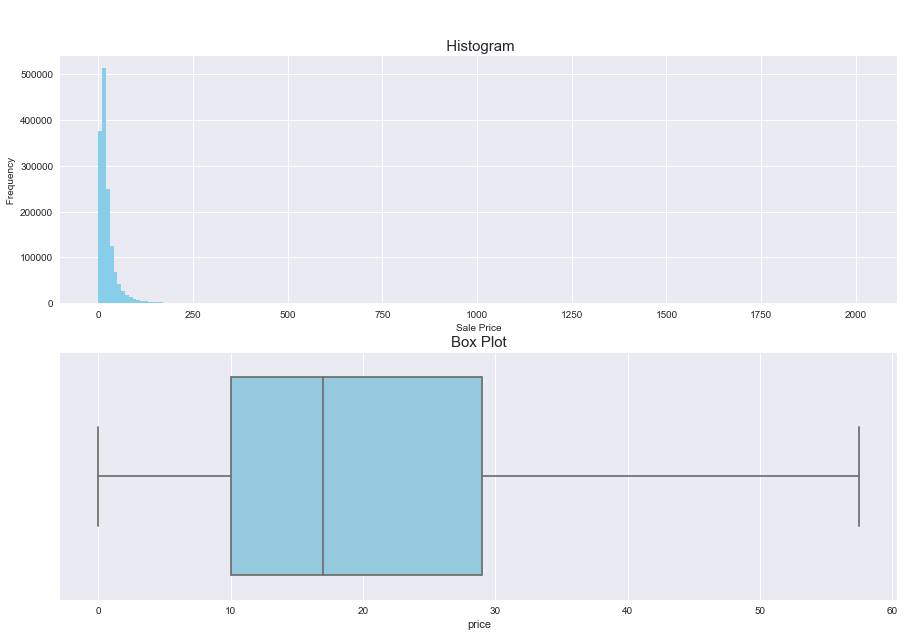

In [12]:
print(" Range of price : ",'$',mercariframe["price"].min(), ' - ','$',mercariframe["price"].max())
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
ax[0].hist(mercariframe.price, bins = 200, range = [min(mercariframe.price), max(mercariframe.price)], label = "price",color = "skyblue")
ax[0].set_title("\n \n  Histogram ", fontsize = 15)
ax[0].set_xlabel("Sale Price", fontsize = 10)
ax[0].set_ylabel(" Frequency ", fontsize = 10)
sns.boxplot(mercariframe.price, showfliers = False, ax = ax[1],color = "skyblue")
ax[1].set_title("Box Plot", fontsize = 15)
plt.show()

In [12]:
# sns.pairplot(mercariframe)

### Brand Name

Unique Brand Names : 4809


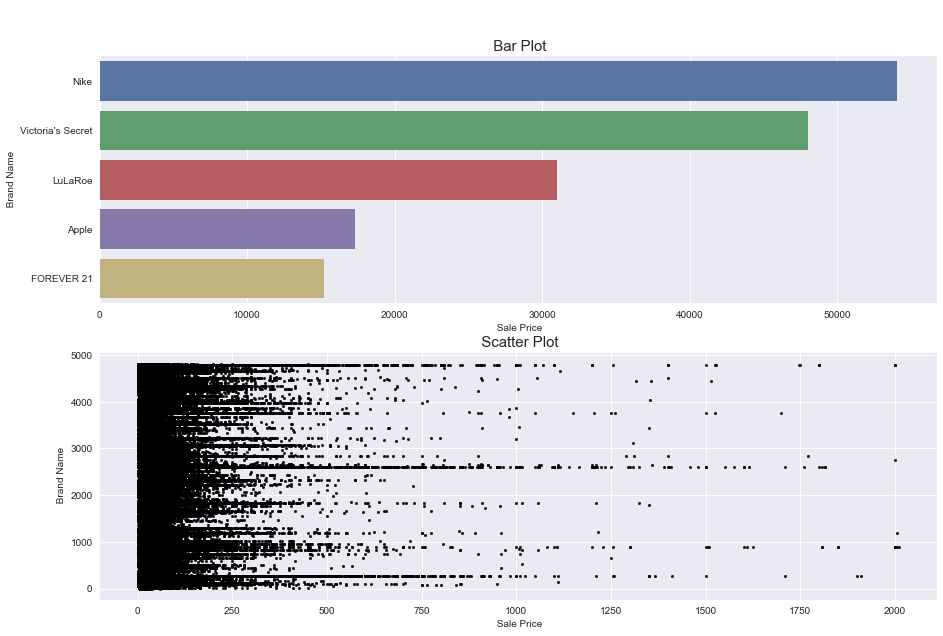

In [14]:
brands = mercariframe["brand_name"].value_counts()
print("Unique Brand Names :", brands.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
sns.barplot(brands[1:6].values, brands[1:6].index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = mercariframe['price'].values
f2 = mercariframe['n_brand_name'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
ax[0].set_ylabel(" Brand Name", fontsize = 10)
ax[1].set_xlabel(" Sale Price", fontsize = 10)
ax[1].set_ylabel(" Brand Name", fontsize = 10)
plt.show()

### Item Condition id

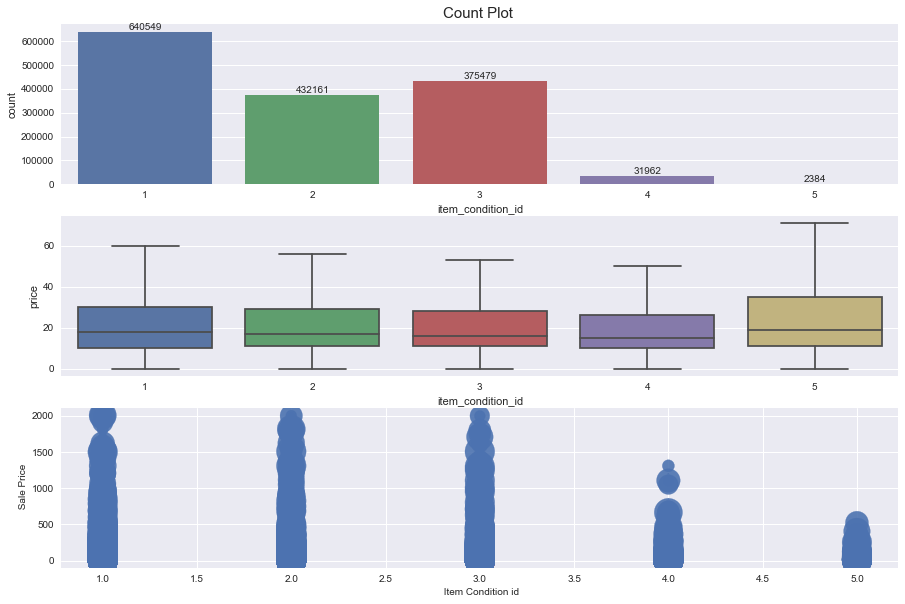

In [15]:
fig, ax = plt.subplots(3, 1, figsize = (15,10))
sns.countplot(mercariframe.item_condition_id, ax = ax[0])
rectangles = ax[0].patches
ax[0].set_title("Count Plot ", fontsize = 15)
labels = mercariframe.item_condition_id.value_counts().values
for rect, label in zip(rectangles, labels):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = "center", va = "bottom")
sns.boxplot(x = mercariframe.item_condition_id, y = mercariframe.price,showfliers = False, orient = "v", ax = ax[1])
area = (30 * np.random.rand(50))**2 
ax[2].scatter(x = mercariframe.item_condition_id, y = mercariframe.price, s=area,alpha=0.9)
ax[2].set_xlabel(" Item Condition id", fontsize = 10)
ax[2].set_ylabel(" Sale Price", fontsize = 10)
plt.show()

### Main Category

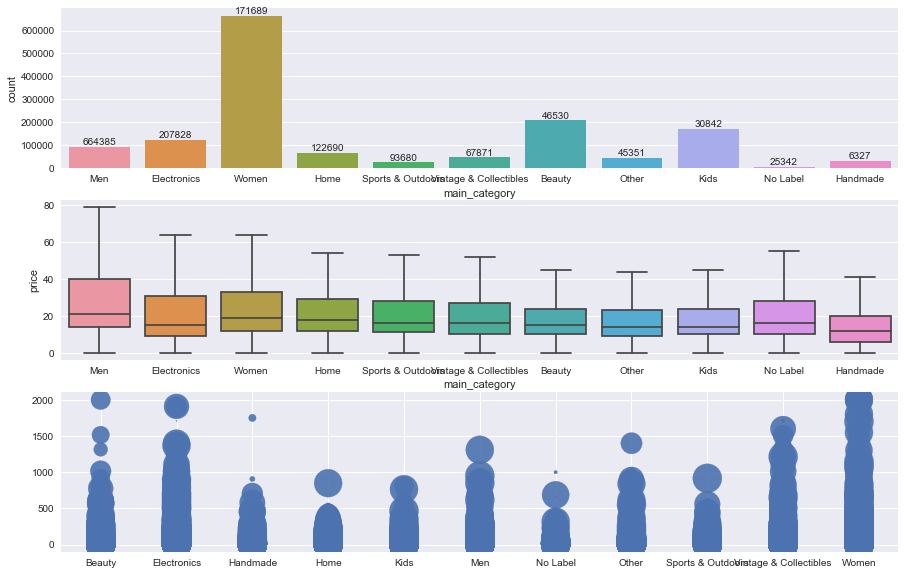

In [16]:
fig, ax = plt.subplots(3, 1, figsize = (15,10))
sns.countplot(mercariframe.main_category, ax = ax[0])
rectangles = ax[0].patches
labels = mercariframe.main_category.value_counts().values
for rect, label in zip(rectangles, labels):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = "center", va = "bottom")
sns.boxplot(x = mercariframe.main_category, y = mercariframe.price,showfliers = False, orient = "v", ax = ax[1])
area = (30 * np.random.rand(50))**2 
ax[2].scatter(x = mercariframe.main_category, y = mercariframe.price, s=area,alpha=0.9)
plt.show()

###  Shipping

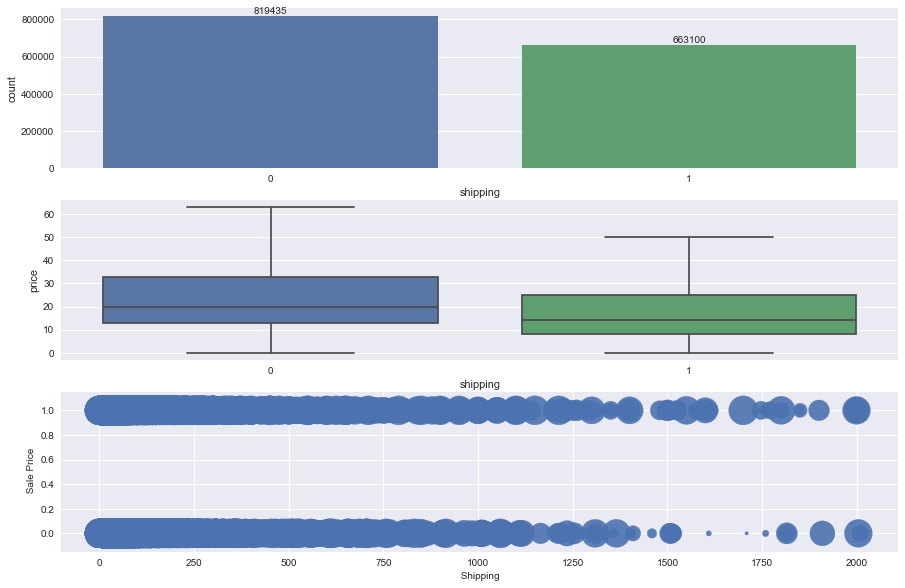

In [17]:
fig, ax = plt.subplots(3, 1, figsize = (15,10))
sns.countplot(mercariframe.shipping, ax = ax[0])
rectangles = ax[0].patches
labels = mercariframe.shipping.value_counts().values
for rect, label in zip(rectangles, labels):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = "center", va = "bottom")
sns.boxplot(x = mercariframe.shipping, y = mercariframe.price,showfliers = False, orient = "v", ax = ax[1])
ax[2].scatter(x = mercariframe.price, y = mercariframe.shipping, s=area,alpha=0.9)
ax[2].set_xlabel(" Shipping ", fontsize = 10)
ax[2].set_ylabel(" Sale Price", fontsize = 10)
plt.show()

### Item Description

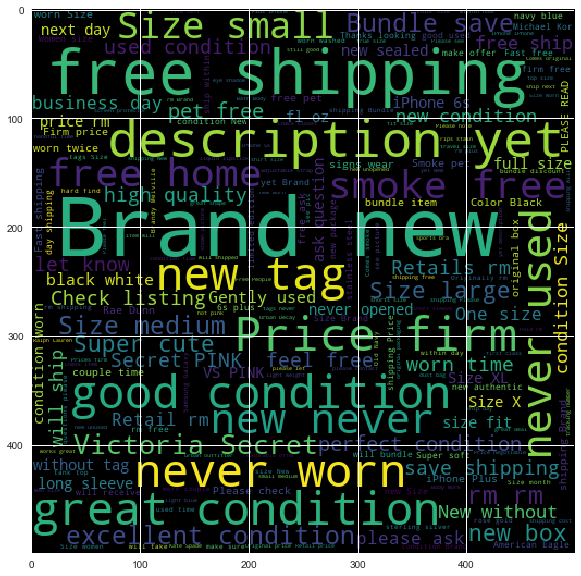

In [51]:
from wordcloud import WordCloud
import os
#python -m pip install wordcloud

wordcloud = WordCloud(width = 500, height = 500).generate(" ".join(mercariframe.item_description.astype(str)))
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.show()

# Step 5 : Data Modeling

## Model 1 :  Linear Regression


Text(0.5,0.98,' Correlations Heat Map for attributes')

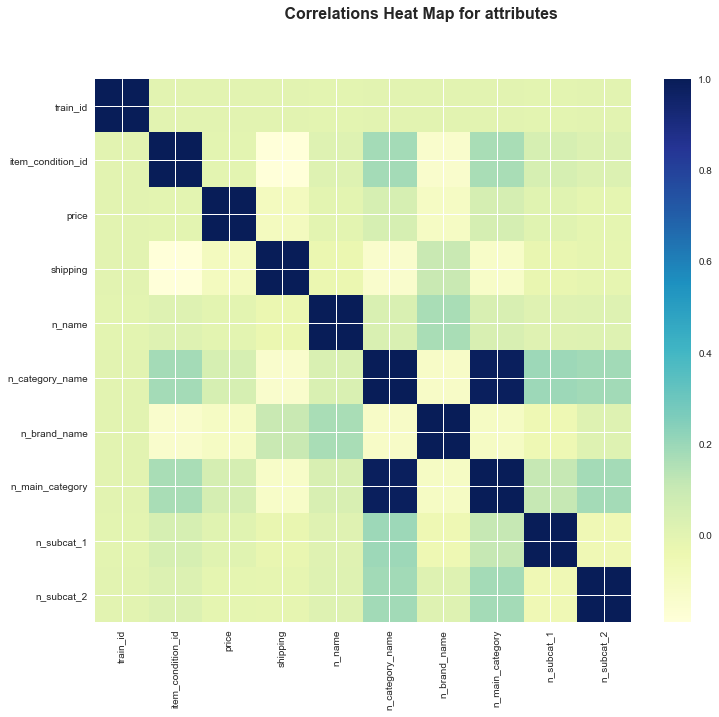

In [18]:
corltn=mercariframe.corr()
corltn=corltn.fillna(0)
plt.figure(figsize=(12, 10))
plt.imshow(corltn, cmap='YlGnBu', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corltn)), corltn.columns, rotation='vertical')
plt.yticks(range(len(corltn)), corltn.columns);
plt.suptitle(' Correlations Heat Map for attributes', fontsize=16, fontweight='bold')

#### Observation
Corelation is not good for attributes to predict price. 
Lets check with regression

### Using Category_name 

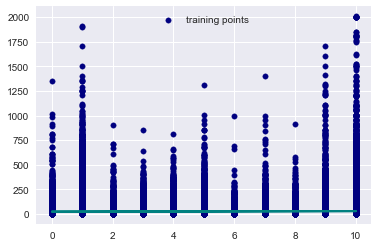

In [19]:
X_train, x_test, Y_train, y_test = train_test_split(
mercariframe['n_main_category'], mercariframe['price'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
X_train = X_train[:, np.newaxis]
Y_train = Y_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
plt.scatter(X_train, Y_train, color='navy', s=30, marker='o', label="training points")
plt.plot(x_test, y_predict, color='teal', linewidth=2)
plt.legend(loc='best')
plt.show()

###  Using main_category, item_condition_id 

In [20]:
r_data= mercariframe[['n_main_category','n_subcat_1']]
X_train, x_test, Y_train, y_test = train_test_split(
r_data, mercariframe['price'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
Y_train = Y_train[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
mean_squared_error(y_test,y_predict)


1560.2714571209872

###  Using main_category, item_condition_id, brand_name , shipping

In [21]:
r_data= mercariframe[['n_main_category','item_condition_id','n_brand_name','shipping']]
X_train, x_test, Y_train, y_test = train_test_split(
r_data, mercariframe['price'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
Y_train = Y_train[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
mean_squared_error(y_test,y_predict)

1530.0051507827875

###  Using main_category, item_condition_id, brand_name , shipping, subcat_1, n_subcat_2, n_name

In [22]:
r_data= mercariframe[['n_main_category','item_condition_id','n_brand_name','shipping','n_subcat_1','n_subcat_2','n_name']]
X_train, x_test, Y_train, y_test = train_test_split(
r_data, mercariframe['price'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
Y_train = Y_train[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
mean_squared_error(y_test,y_predict)

1529.3795849046646

#### Observation
We tried different combination based on coorelation. We did not get better MSE as predicted by just observing corelation

In [23]:
cats = mercariframe['main_category'].value_counts().index.values.astype('str')
cats

array(['Women', 'Beauty', 'Kids', 'Electronics', 'Men', 'Home',
       'Vintage & Collectibles', 'Other', 'Handmade', 'Sports & Outdoors',
       'No Label'],
      dtype='<U22')

####  Important points
The dataset can de divided into 11 different categories.  For example, we can seperate all
products related to Men as one dataset , product related to Women as another dataset.

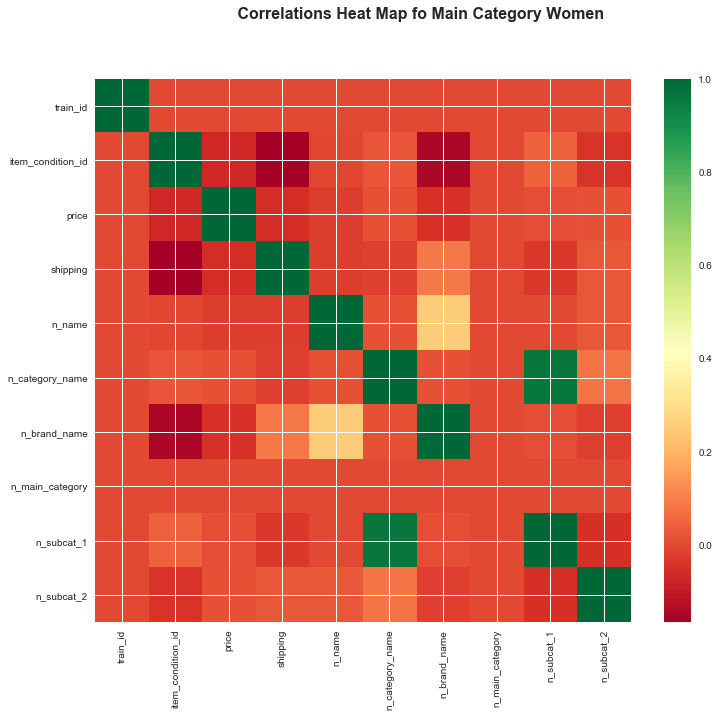

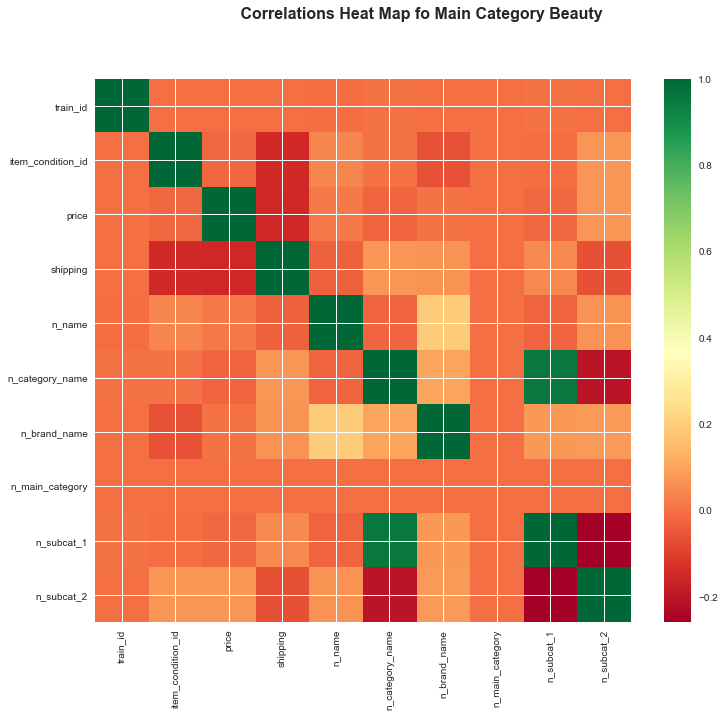

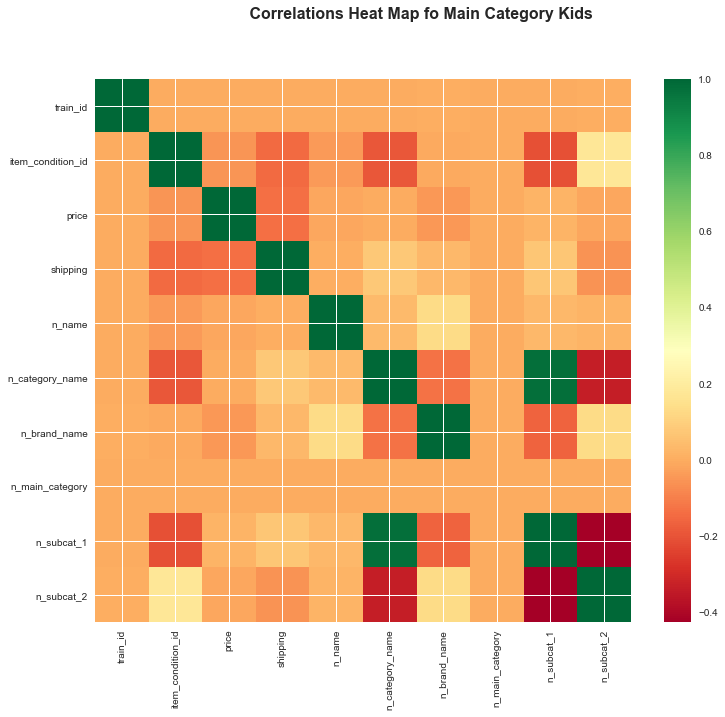

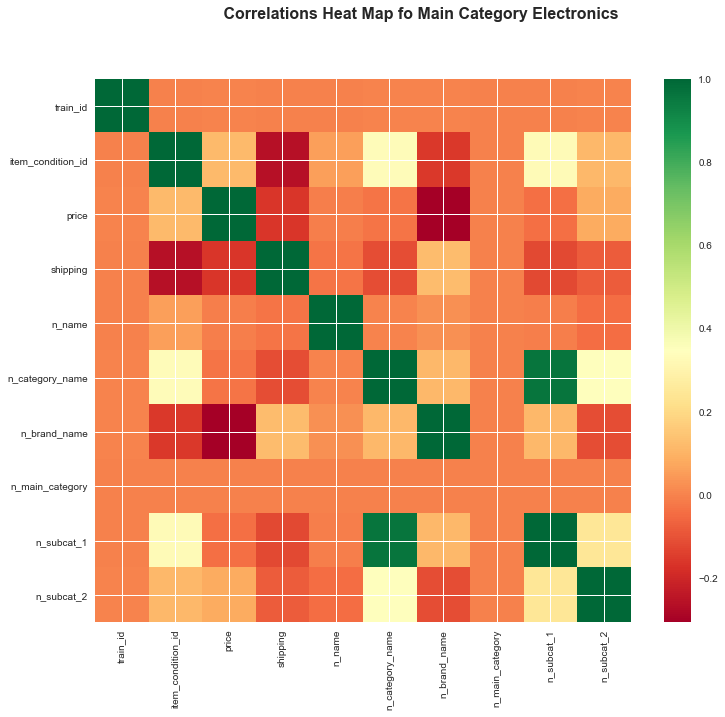

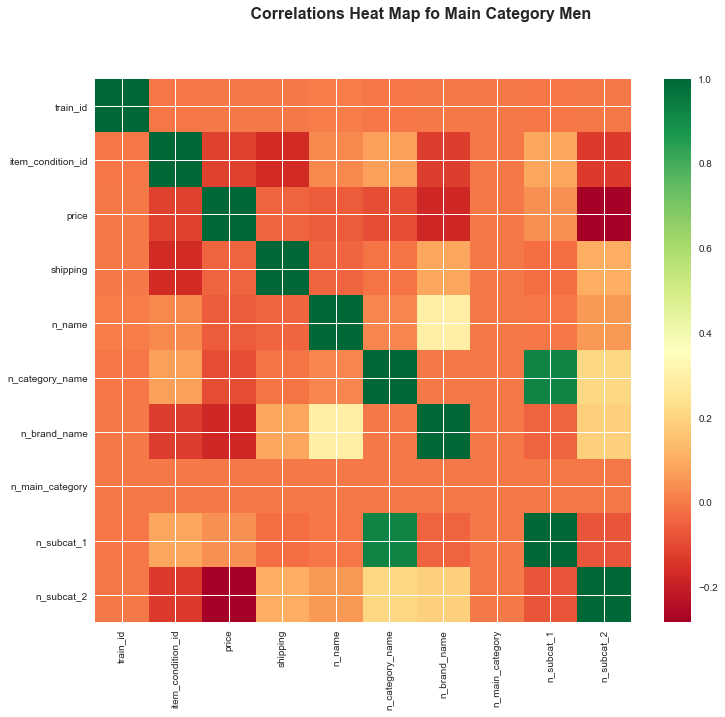

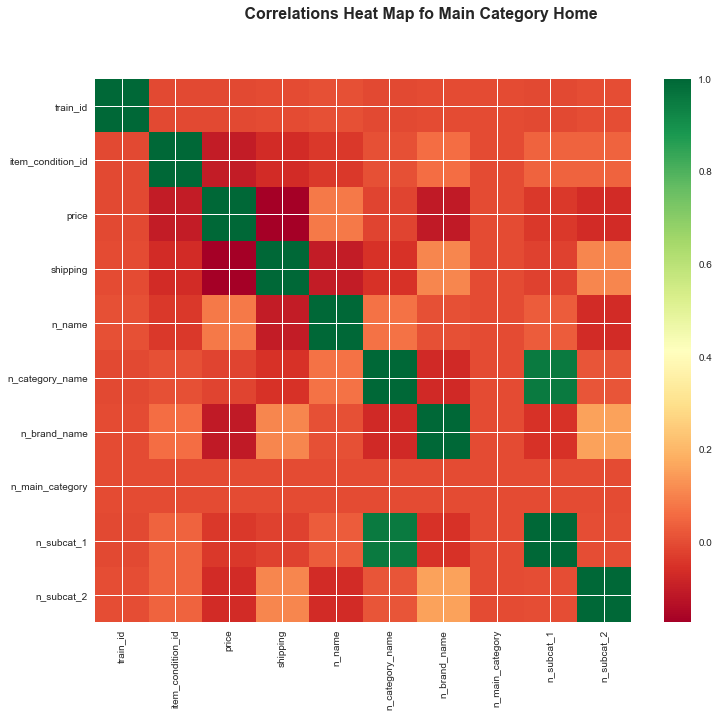

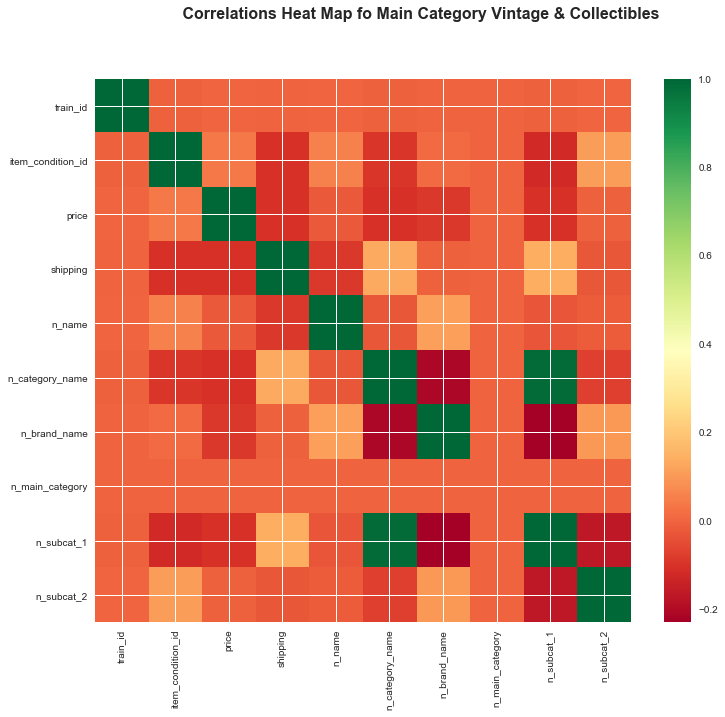

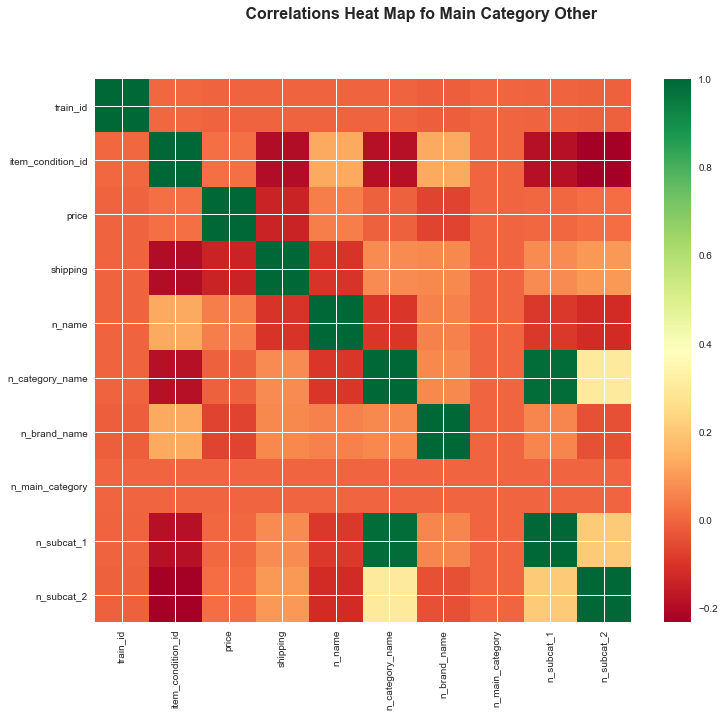

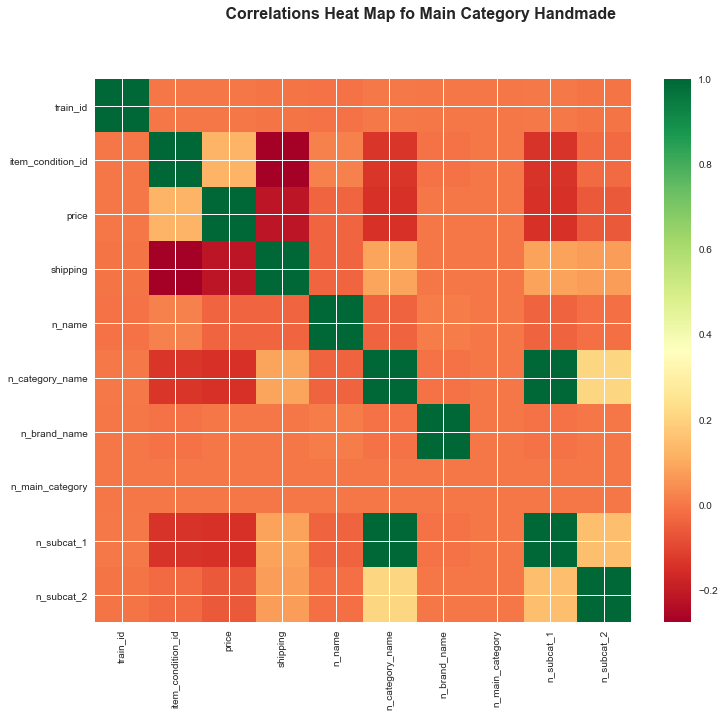

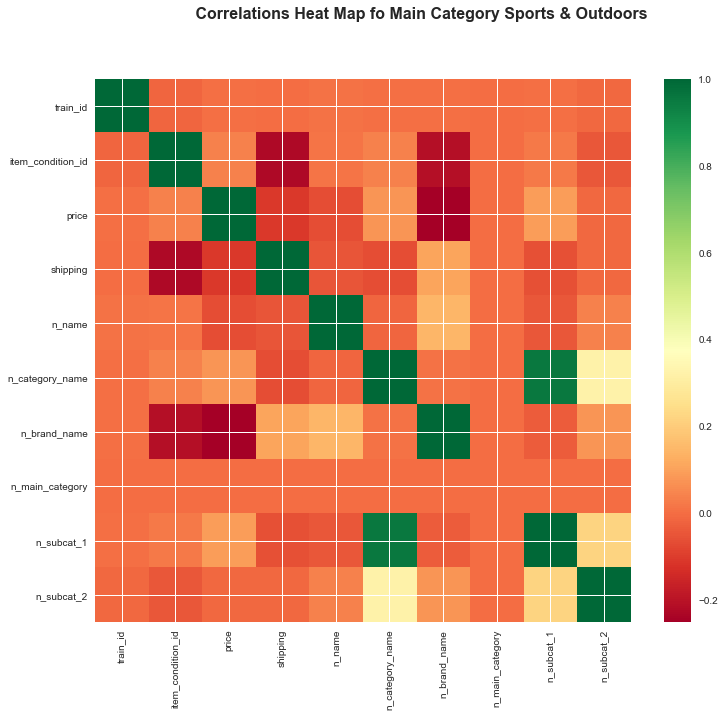

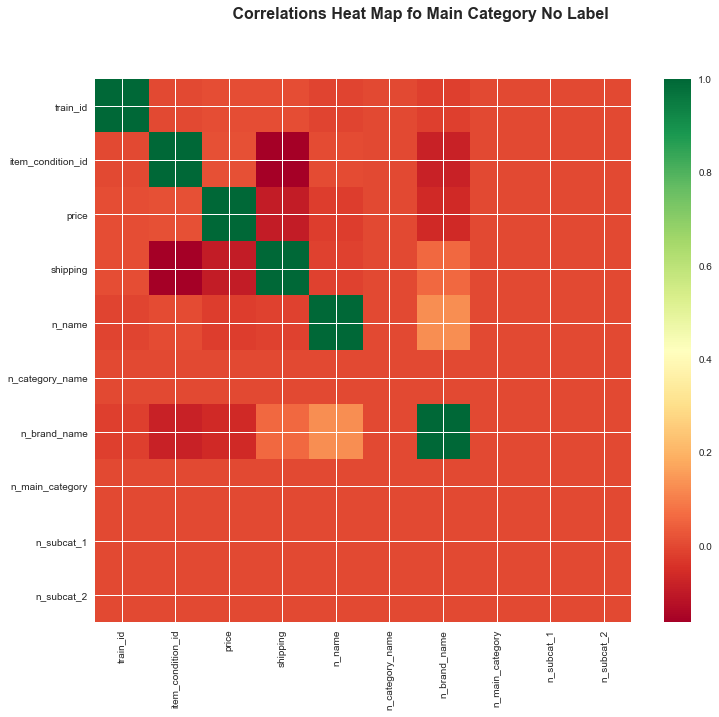

In [24]:
for data in cats:
    gtrain_cat=mercariframe.loc[mercariframe['main_category'] == data]
    corltn=gtrain_cat.corr()
    corltn=corltn.fillna(0)
    plt.figure(figsize=(12, 10))
    plt.imshow(corltn, cmap='RdYlGn', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corltn)), corltn.columns, rotation='vertical')
    plt.yticks(range(len(corltn)), corltn.columns);
    plt.suptitle(' Correlations Heat Map fo Main Category '+ data, fontsize=16, fontweight='bold')
    plt.show()
 

##### Analysis
Here we can see that for Handmade, Sports & Outdoors ,Electronics main Categories have 
a bit positive corealation with the other attributes.
So attributes for this datasets should be able to improve the model when we do regression by restricting data to specific categories
 The same thing was absorved after doing the regression

### Using  Kids Category with best correlated attributes

In [25]:
gtrain_category=mercariframe.loc[mercariframe['main_category'] == 'Kids']
r_data= gtrain_category[['n_name','n_subcat_1','n_main_category']]
X_train, x_test, Y_train, y_test = train_test_split(
r_data, gtrain_category['price'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
Y_train = Y_train[:, np.newaxis]

regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
mean_squared_error(y_test,y_predict)

526.03325545413134

### Using  Handmade Category with best correlated attributes

In [26]:
gtrain_category_handmade=mercariframe.loc[mercariframe['main_category'] ==  'Handmade']
r_data= gtrain_category_handmade[['item_condition_id']]
X_train, x_test, Y_train, y_test = train_test_split(
r_data, gtrain_category_handmade['price'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
Y_train = Y_train[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
mean_squared_error(y_test,y_predict)

563.97318141304277

### Using Sports & Outdoors Category with best correlated attributes

In [27]:

gtrain_category_SO=mercariframe.loc[mercariframe['main_category'] =='Sports & Outdoors']
# print(gtrain_category)
r_data= gtrain_category_SO[['n_subcat_1','n_main_category']]
# print(r_data.shape)
X_train, x_test, Y_train, y_test = train_test_split(
r_data, gtrain_category_SO['price'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
Y_train = Y_train[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
mean_squared_error(y_test,y_predict)

761.04055953763429

### Considering product description length

In [28]:
# def wordCount2(text):
#     # convert to lower case and strip regex
#          # convert to lower case and strip regex
#         try:
#             text = text.lower()
#             regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]') 
#             txt = regex.sub(" ", text)
#             # tokenize
#             # words = nltk.word_tokenize(clean_txt)
#             # remove words in stop words
#             words = [w for w in txt.split(" ") \
#                      if not w in set(stopwords.words('english'))]       
#             return len(words)
#         except: 
#             return 0

In [29]:
# mercariframe['desc_len'] = mercariframe['item_description'].apply(lambda x: wordCount2(x))

In [30]:
#     corltn=mercariframe.corr()
#     corltn=corltn.fillna(0)
#     plt.figure(figsize=(12, 10))
#     plt.imshow(corltn, cmap='RdYlGn', interpolation='none', aspect='auto')
#     plt.colorbar()
#     plt.xticks(range(len(corltn)), corltn.columns, rotation='vertical')
#     plt.yticks(range(len(corltn)), corltn.columns);
#     plt.suptitle(' Correlations Heat Map', fontsize=16, fontweight='bold')
#     plt.show()

#### Correlation for data based on main categories inclusing product description length.

In [31]:
# for data in cats:
#     gtrain_cat=mercariframe.loc[mercariframe['main_category'] == data]
#     corltn=gtrain_cat.corr()
#     corltn=corltn.fillna(0)
#     plt.figure(figsize=(12, 10))
#     plt.imshow(corltn, cmap='RdYlGn', interpolation='none', aspect='auto')
#     plt.colorbar()
#     plt.xticks(range(len(corltn)), corltn.columns, rotation='vertical')
#     plt.yticks(range(len(corltn)), corltn.columns);
#     plt.suptitle(' Correlations Heat Map fo Main Category '+ data, fontsize=16, fontweight='bold')
#     plt.show()

## Conclusion for Regression


1. The corelation between attributes is observed to be very poor
2. We tried to improve the fit by trying different combinations and considering different scenarios. 
3. We are able to improve the MSR but we cannot consider Linear regression as the best modelling for the dataset we have.

## Model 2 : Naive Bayes Classifier 

Our idea to observe how Product description impacts price.  Since the mean of data is around 28 Dollars and 
majority of the product prices are between 1-50 Dollars, we plan to divide the products into different
bins based on price and predict if a certain product belongs to which specific bin based on the product description.

In [32]:
def split_cat(text):
    try: return text.split("/")
    except: return ("No Label", "No Label", "No Label")

In [33]:
def histplot(data):
    plt.subplot(1, 2, 1)
    (data['price']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,250],normed=True)
    plt.xlabel('price+', fontsize=17)
    plt.ylabel('frequency', fontsize=17)
    plt.tick_params(labelsize=15)
    plt.title('Price Distribution', fontsize=17)
    plt.show()
    print(data.price.describe())

In [34]:
def gtrain_category(data):
    return mercariframe.loc[mercariframe['main_category'] == data]

In [35]:
def divide_cats(data):
    if( data <=5):
        return "CAT5"
    if( 5 < data <=10):
        return "CAT10"
    if( 10 < data <=15):
        return "CAT15"
    if( 15 < data <=20):
        return "CAT20"
    if(20 < data <=25):
        return "CAT25"
    if( 25< data <=30):
        return "CAT30"
    if( 30 < data <=35):
        return "CAT35"
    if( 35 < data <=40):
        return "CAT40"
    if( 40 < data <=45):
        return "CAT45"
    if(45 < data <=50):
        return "CAT50"
    return "CATOTHER"

In [36]:
def bernoulliVectorNB(data):
    X_train, x_test, Y_train, y_test = train_test_split(
    data['item_description'], data['price_cats'], test_size=0.2, random_state=42)
    vectorizer = CountVectorizer(binary='true')
    #  print(X_train.shape)
    TK = vectorizer.fit_transform(X_train.values.astype('U'))
    # print(TK.shape)
    # TKD = TK.todense()
    # print(TKD)
    clf = BernoulliNB()
    clf.fit(TK,Y_train )
    # print(x_test)
    TS = vectorizer.transform(x_test.values.astype('U'))
    labels = clf.predict(TS)
    #print(labels)
    #print(test.target)
    mat = confusion_matrix(y_test, labels)
    # print(mat)
    names=['CAT5','CAT10','CAT15','CAT20','CAT25','CAT30','CAT35','CAT40','CAT45','CAT50','CATOTHER']
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=names, yticklabels=names)
    plt.xlabel('true label')
    plt.ylabel('predicted label')


In [37]:
def multiNomialNBModel(data):
    X_train, x_test, Y_train, y_test = train_test_split(
    data['item_description'], data['price_cats'], test_size=0.2, random_state=42)
    vectorizer = TfidfVectorizer()
    TK = vectorizer.fit_transform(X_train.values.astype('U'))
    clf = MultinomialNB()
    clf.fit(TK, Y_train)
    TS = vectorizer.transform(x_test.values.astype('U'))
    labels = clf.predict(TS)
    mat = confusion_matrix(y_test, labels)
    names=['CAT5','CAT10','CAT15','CAT20','CAT25','CAT30','CAT35','CAT40','CAT45','CAT50','CATOTHER']
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=names, yticklabels=names)
    plt.xlabel('true label')
    plt.ylabel('predicted label')

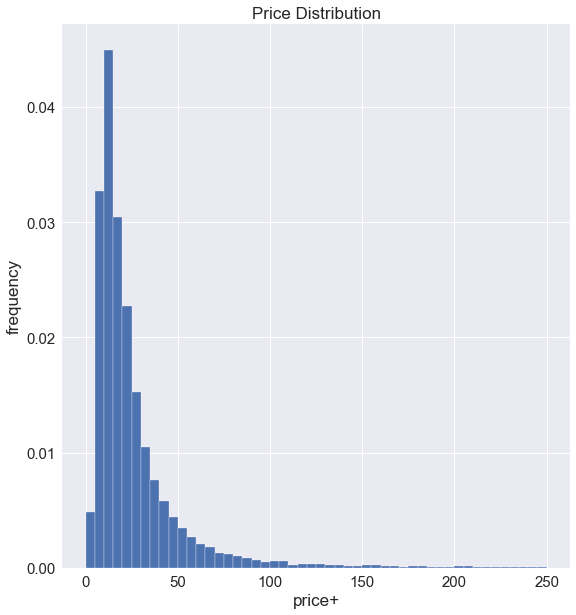

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64


In [38]:
histplot(mercariframe)

In [39]:
mercariframe['price_cats'] =mercariframe.price.map(lambda x : divide_cats(x))

## Bernoulli NB

### Applying bernoulli NB  for the entire data set

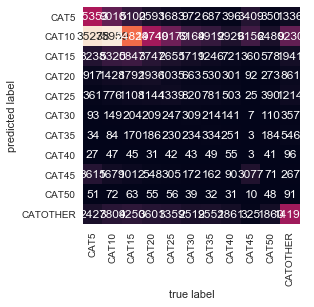

In [40]:
bernoulliVectorNB(mercariframe) 

### Applying bernoulli NB  for Women Category data

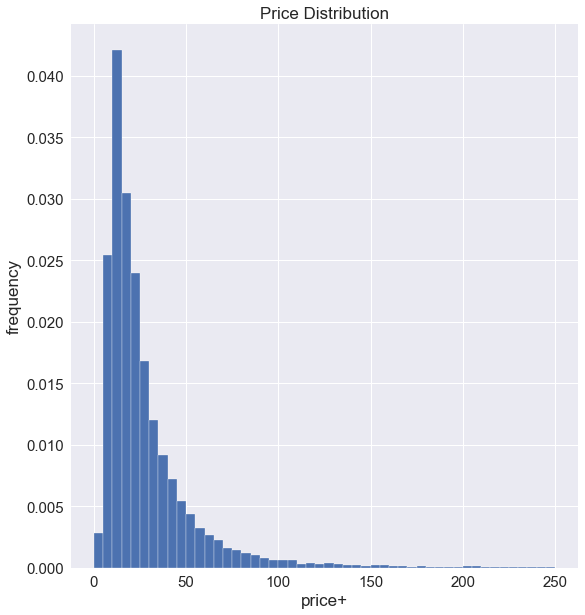

count    664385.000000
mean         28.885496
std          39.443853
min           0.000000
25%          12.000000
50%          19.000000
75%          33.000000
max        2009.000000
Name: price, dtype: float64


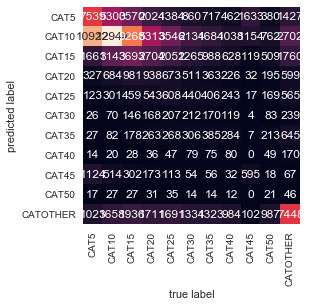

In [41]:
gtrain_cats= gtrain_category('Women')
# print(gtrain_cats.shape)
histplot(gtrain_cats)   
bernoulliVectorNB(gtrain_cats)

### Applying bernoulli NB  for Beauty Category data

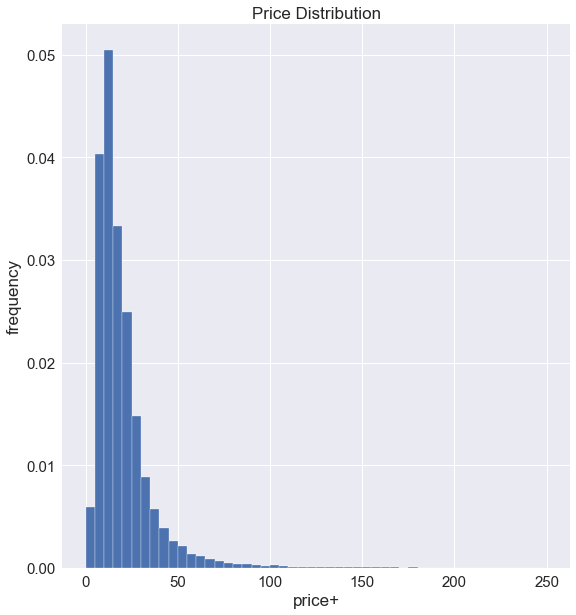

count    207828.000000
mean         19.671536
std          21.360135
min           0.000000
25%          10.000000
50%          15.000000
75%          24.000000
max        2000.000000
Name: price, dtype: float64


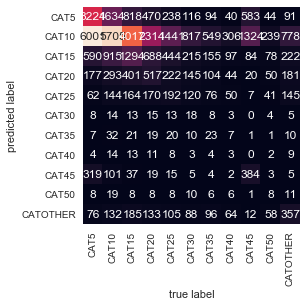

In [42]:
gtrain_cats= gtrain_category('Beauty')
# print(gtrain_cats.shape)
histplot(gtrain_cats)   
bernoulliVectorNB(gtrain_cats)

### Applying bernoulli NB  for Kids Category data

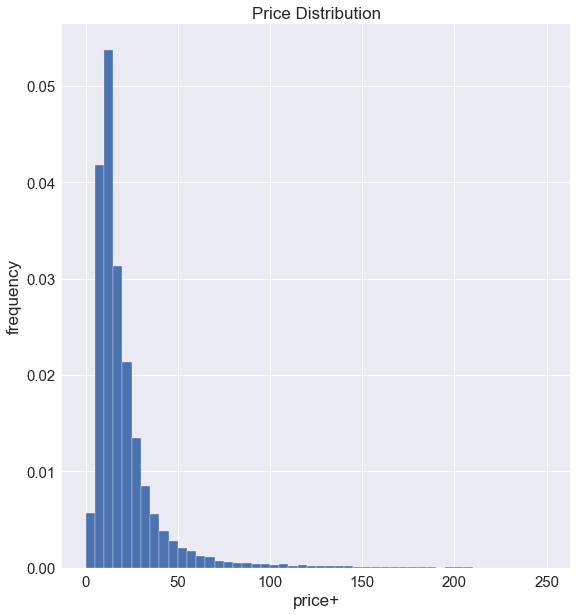

count    171689.000000
mean         20.642315
std          22.730876
min           0.000000
25%          10.000000
50%          14.000000
75%          24.000000
max         809.000000
Name: price, dtype: float64


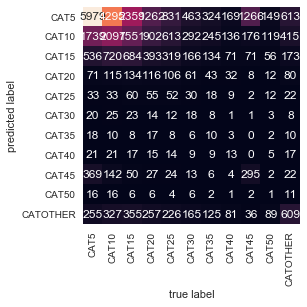

In [43]:
gtrain_cats= gtrain_category('Kids')
# print(gtrain_cats.shape)
histplot(gtrain_cats)   
bernoulliVectorNB(gtrain_cats)

### Applying bernoulli NB  for Electronics Category data

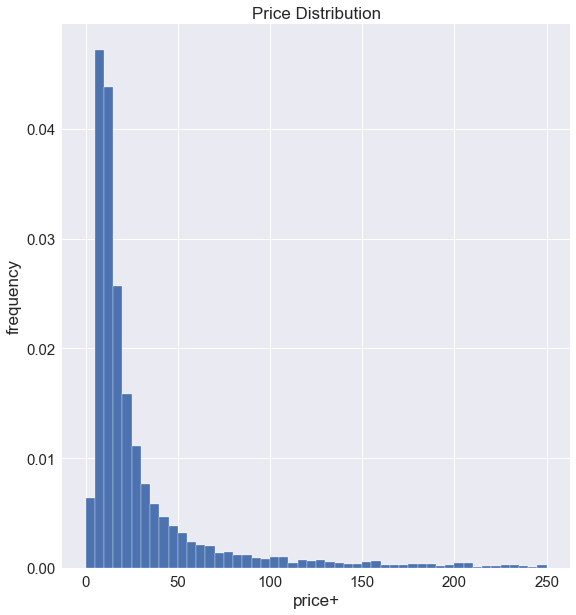

count    122690.000000
mean         35.173922
std          65.419784
min           0.000000
25%           9.000000
50%          15.000000
75%          31.000000
max        1909.000000
Name: price, dtype: float64


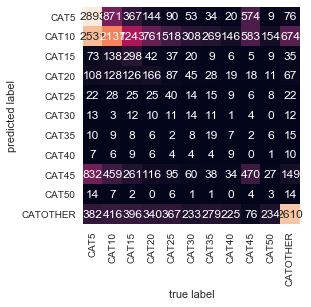

In [44]:
gtrain_cats= gtrain_category('Electronics')
# print(gtrain_cats.shape)
histplot(gtrain_cats)   
bernoulliVectorNB(gtrain_cats)

### Applying bernoulli NB  for Men Category data

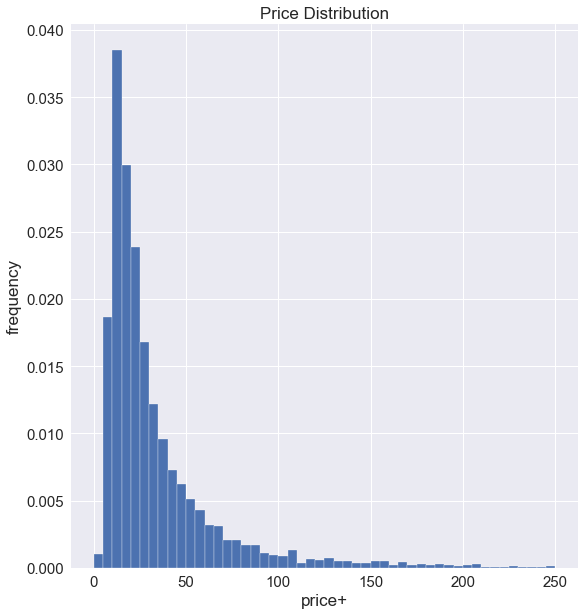

count    93680.000000
mean        34.708614
std         41.240057
min          0.000000
25%         14.000000
50%         21.000000
75%         40.000000
max       1309.000000
Name: price, dtype: float64


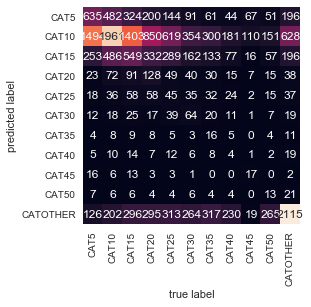

In [45]:
gtrain_cats= gtrain_category('Men')
# print(gtrain_cats.shape)
histplot(gtrain_cats)   
bernoulliVectorNB(gtrain_cats)

### Applying bernoulli NB  for Home Category data

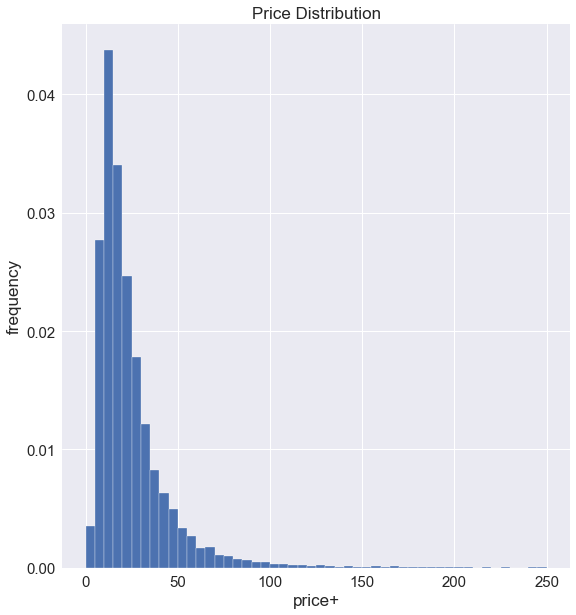

count    67871.000000
mean        24.536599
std         24.417061
min          0.000000
25%         12.000000
50%         18.000000
75%         29.000000
max        848.000000
Name: price, dtype: float64


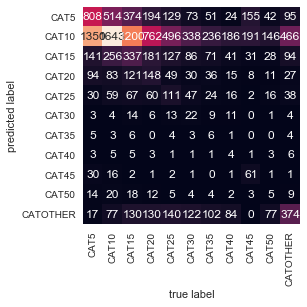

In [46]:
gtrain_cats= gtrain_category('Home')
# print(gtrain_cats.shape)
histplot(gtrain_cats)   
bernoulliVectorNB(gtrain_cats)

### Applying bernoulli NB  for Vintage & Collectibles Category data

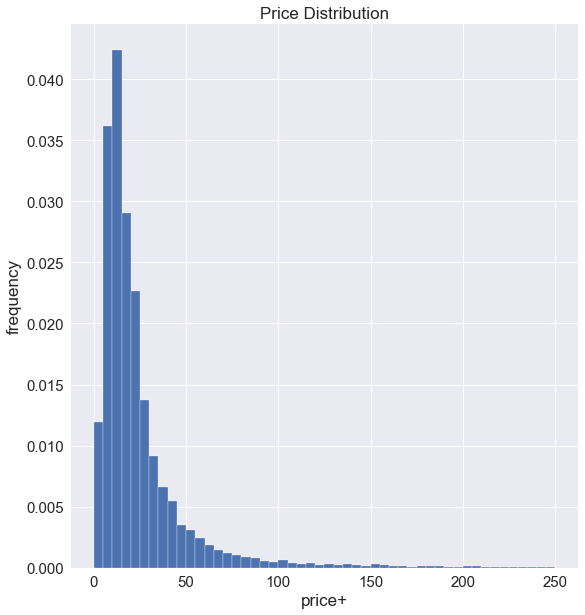

count    46530.000000
mean        27.339426
std         53.507495
min          0.000000
25%         10.000000
50%         16.000000
75%         27.000000
max       1709.000000
Name: price, dtype: float64


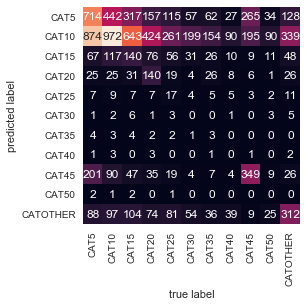

In [47]:
gtrain_cats= gtrain_category('Vintage & Collectibles')
# print(gtrain_cats.shape)
histplot(gtrain_cats)   
bernoulliVectorNB(gtrain_cats)

### Applying bernoulli NB  for Handmade Category data

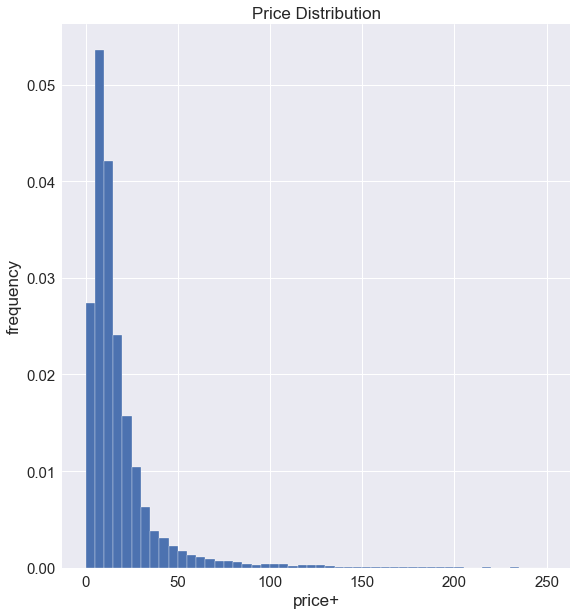

count    30842.000000
mean        18.156572
std         27.758289
min          0.000000
25%          6.000000
50%         12.000000
75%         20.000000
max       1750.000000
Name: price, dtype: float64


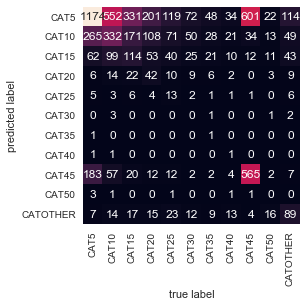

In [48]:
gtrain_cats= gtrain_category('Handmade')
# print(gtrain_cats.shape)
histplot(gtrain_cats)   
bernoulliVectorNB(gtrain_cats)

### Applying bernoulli NB  for Sports & Outdoors Category data

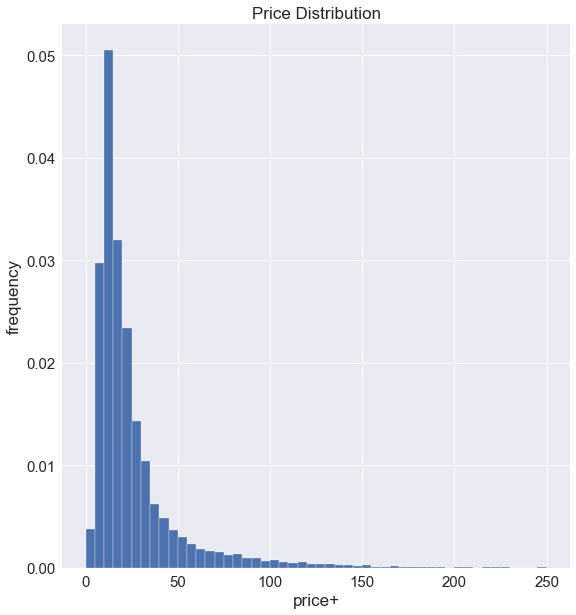

count    25342.000000
mean        25.532219
std         29.302234
min          0.000000
25%         11.000000
50%         16.000000
75%         28.000000
max        915.000000
Name: price, dtype: float64


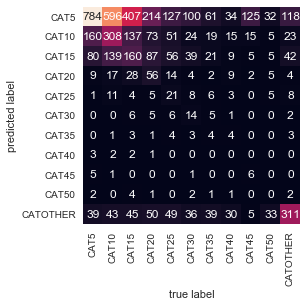

In [49]:
gtrain_cats= gtrain_category('Sports & Outdoors')
# print(gtrain_cats.shape)
histplot(gtrain_cats)   
bernoulliVectorNB(gtrain_cats)

## MultiNomial NB Model

In [50]:
### MultiNomial NB Model for whole dataset

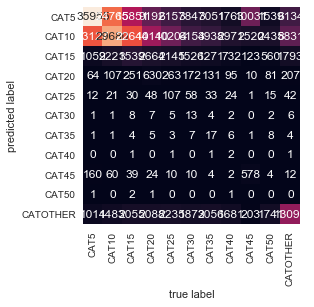

In [51]:
multiNomialNBModel(mercariframe)

### Applying MultiNomial NB  for Women Category data

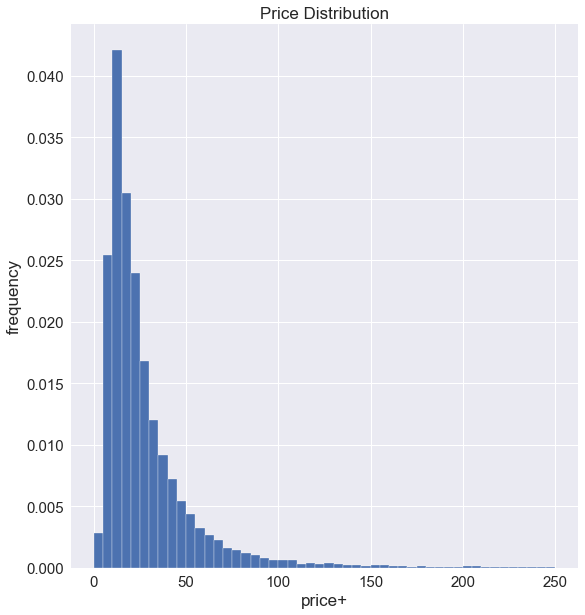

count    664385.000000
mean         28.885496
std          39.443853
min           0.000000
25%          12.000000
50%          19.000000
75%          33.000000
max        2009.000000
Name: price, dtype: float64


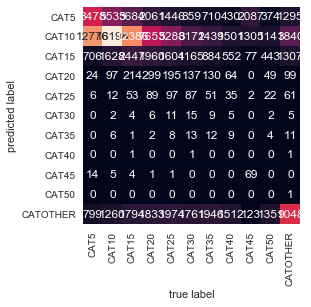

In [52]:
gtrain_cats= gtrain_category('Women')
# print(gtrain_cats.shape)
histplot(gtrain_cats)   
multiNomialNBModel(gtrain_cats)

### Applying MultiNomial NB  for Beauty Category data

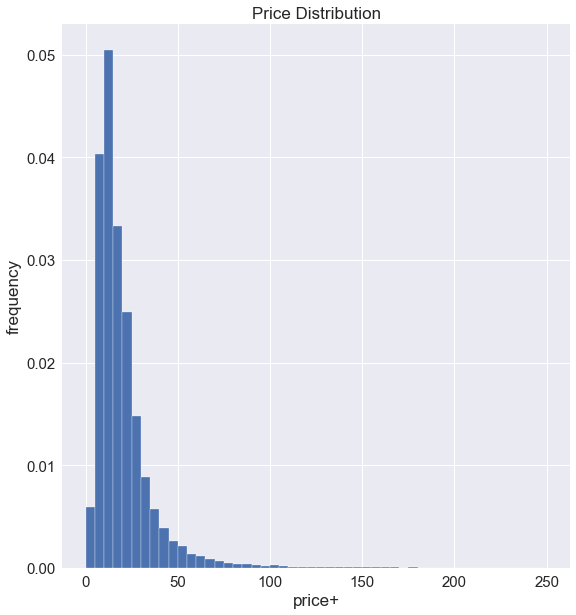

count    207828.000000
mean         19.671536
std          21.360135
min           0.000000
25%          10.000000
50%          15.000000
75%          24.000000
max        2000.000000
Name: price, dtype: float64


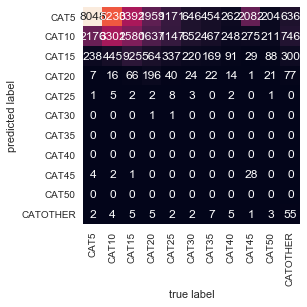

In [53]:
gtrain_cats= gtrain_category('Beauty')
# print(gtrain_cats.shape)
histplot(gtrain_cats)   
multiNomialNBModel(gtrain_cats)

### Applying MultiNomial NB  for Kids Category data

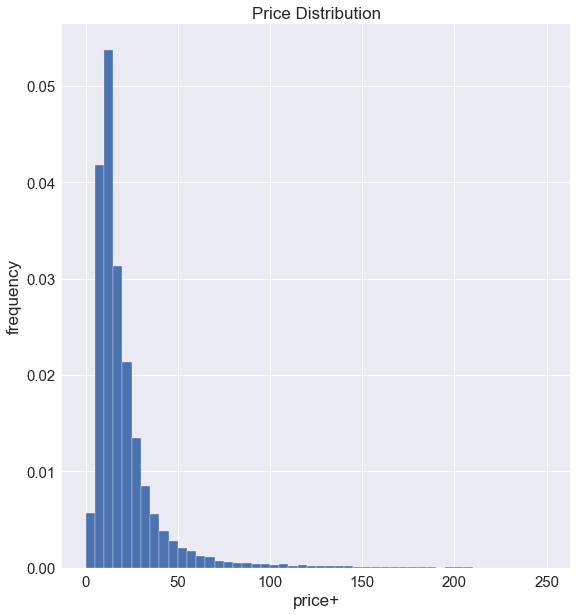

count    171689.000000
mean         20.642315
std          22.730876
min           0.000000
25%          10.000000
50%          14.000000
75%          24.000000
max         809.000000
Name: price, dtype: float64


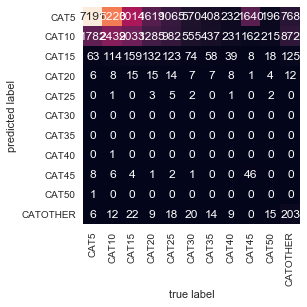

In [54]:
gtrain_cats= gtrain_category('Kids')
# print(gtrain_cats.shape)
histplot(gtrain_cats)   
multiNomialNBModel(gtrain_cats)

### Applying MultiNomial NB  for Electronics Category data

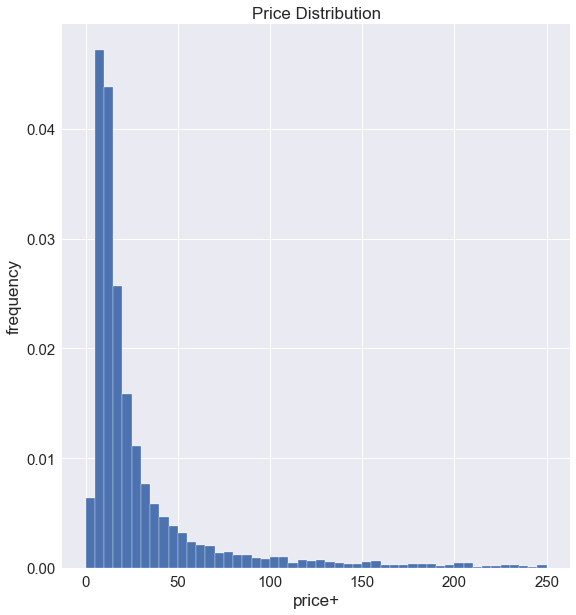

count    122690.000000
mean         35.173922
std          65.419784
min           0.000000
25%           9.000000
50%          15.000000
75%          31.000000
max        1909.000000
Name: price, dtype: float64


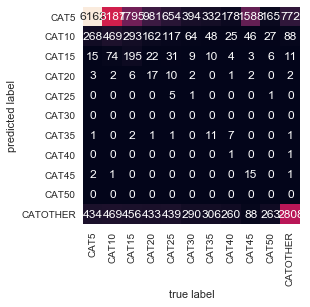

In [55]:
gtrain_cats= gtrain_category('Electronics')
# print(gtrain_cats.shape)
histplot(gtrain_cats)   
multiNomialNBModel(gtrain_cats)

### Applying MultiNomial NB  for Men Category data

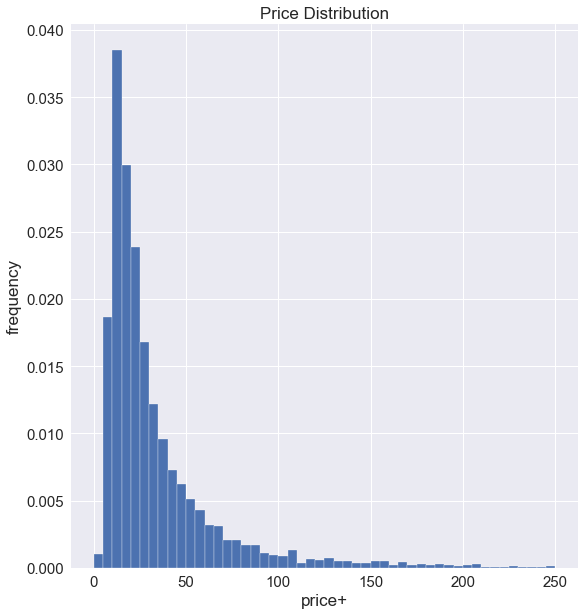

count    93680.000000
mean        34.708614
std         41.240057
min          0.000000
25%         14.000000
50%         21.000000
75%         40.000000
max       1309.000000
Name: price, dtype: float64


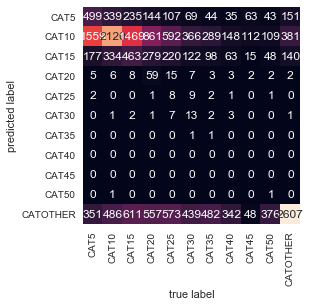

In [56]:
gtrain_cats= gtrain_category('Men')
# print(gtrain_cats.shape)
histplot(gtrain_cats)   
multiNomialNBModel(gtrain_cats)

### Applying MultiNomial NB  for Home Category data

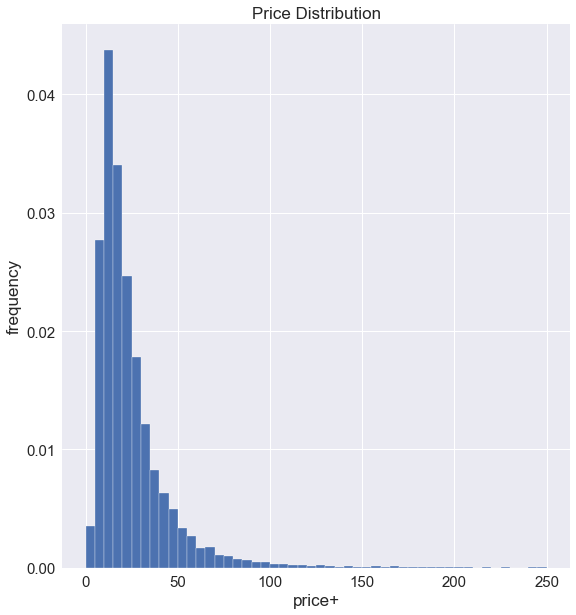

count    67871.000000
mean        24.536599
std         24.417061
min          0.000000
25%         12.000000
50%         18.000000
75%         29.000000
max        848.000000
Name: price, dtype: float64


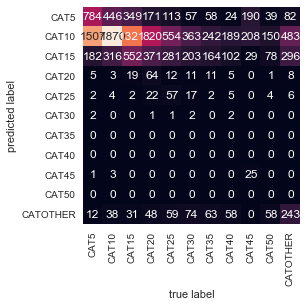

In [57]:
gtrain_cats= gtrain_category('Home')
# print(gtrain_cats.shape)
histplot(gtrain_cats)   
multiNomialNBModel(gtrain_cats)

### Applying MultiNomial NB  for Vintage & Collectibles Category data

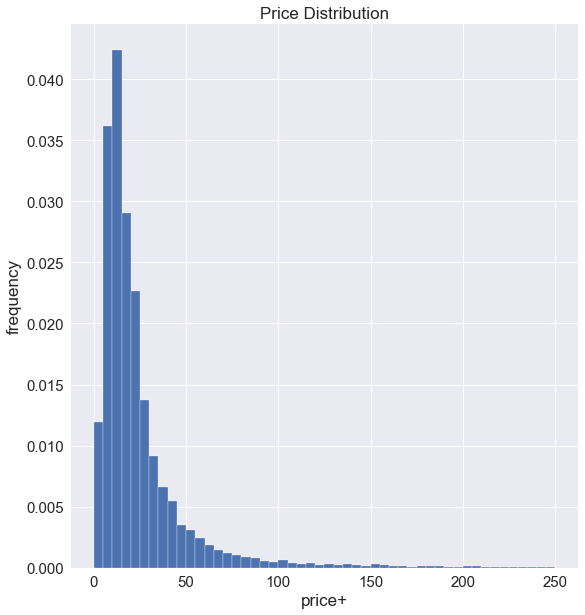

count    46530.000000
mean        27.339426
std         53.507495
min          0.000000
25%         10.000000
50%         16.000000
75%         27.000000
max       1709.000000
Name: price, dtype: float64


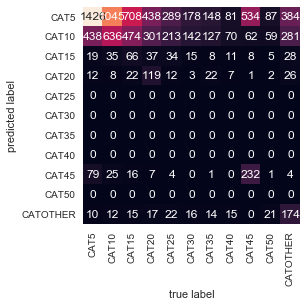

In [58]:
gtrain_cats= gtrain_category('Vintage & Collectibles')
# print(gtrain_cats.shape)
histplot(gtrain_cats)   
multiNomialNBModel(gtrain_cats)

### Applying MultiNomial NB  for Handmade Category data

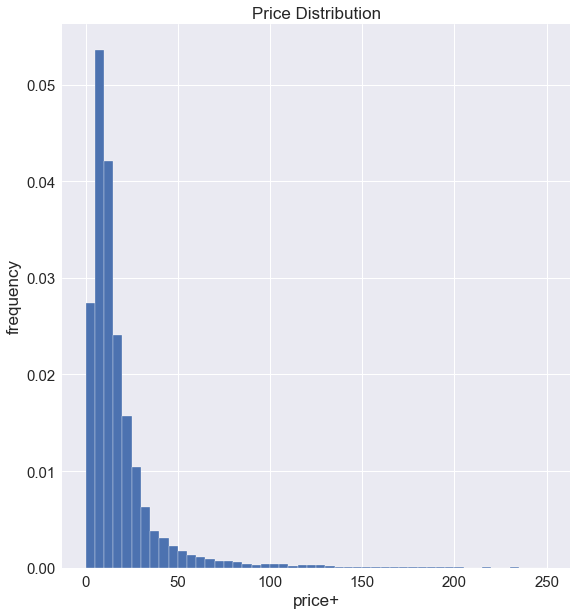

count    30842.000000
mean        18.156572
std         27.758289
min          0.000000
25%          6.000000
50%         12.000000
75%         20.000000
max       1750.000000
Name: price, dtype: float64


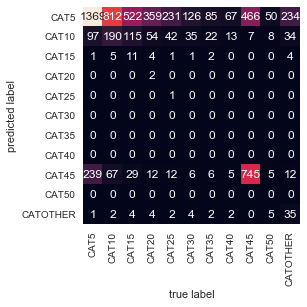

In [59]:
gtrain_cats= gtrain_category('Handmade')
# print(gtrain_cats.shape)
histplot(gtrain_cats)   
multiNomialNBModel(gtrain_cats)

### Applying MultiNomial NB  for Sports & Outdoors' Category data

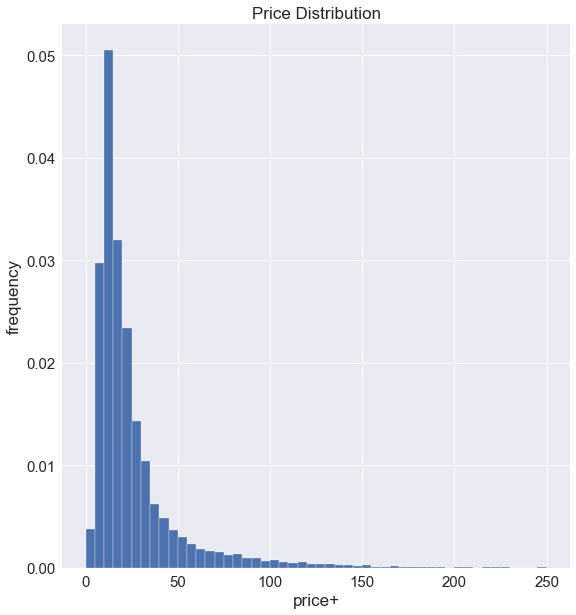

count    25342.000000
mean        25.532219
std         29.302234
min          0.000000
25%         11.000000
50%         16.000000
75%         28.000000
max        915.000000
Name: price, dtype: float64


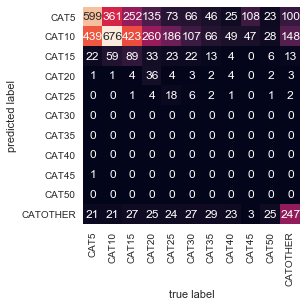

In [60]:
gtrain_cats= gtrain_category('Sports & Outdoors')
# print(gtrain_cats.shape)
histplot(gtrain_cats)   
multiNomialNBModel(gtrain_cats)

# Conclusion for NB


1. Using entire dataset, as per confusion matrix  Multinomial NB Model was able to predict best for the prodcuts in the bins  
   'CAT5' : Price less than 5
   'CAT10': Price between 5 and 10
   'CATOTHER': Price greater than 50

2. Both  Multinomial NB Model, Bernoulli Model  are doing ok to predict prices in the range 0-15 for Women, Beauty Products

3. Both  Multinomial NB Model, Bernoulli Model  are doing ok to predict prices in the range 0-10 for Kids Products

4. Bernoulli Model was  doling best in predicting prices in the bins CAT5, CAT10, CAT45,CATOTHER
5. Both  Multinomial NB Model, Bernoulli Model  are doing best to predict prices in the bins CAT5, CAT10 for Men Products
6. Both  Multinomial NB Model, Bernoulli Model  are doing best to predict prices in the bins CAT10 for Home Products
7. Bernoulli Model is doing best to predict prices in the bins CAT10 for Vintage & Collectibles Products and  Multinomial NB    Model is doing best to predict prices in the bins CAT5 for Vintage & Collectibles
8. Both  Multinomial NB Model, Bernoulli Model  are doing best to predict prices in the bins CAT5, CAT45 for Handmade Products
9. Both  Multinomial NB Model, Bernoulli Model  are doing best to predict prices in the bins CAT5,CAT10, CATOTHER for Sports & Outdoors Products


Ovearall we are able to predict prices best for products under the price range 0-10 using using product description

In [61]:
mercariframe.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_category,subcat_1,subcat_2,n_name,n_category_name,n_brand_name,n_main_category,n_subcat_1,n_subcat_2,price_cats
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts,640809,808,4788,5,103,763,CAT10
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,903932,86,3557,1,30,212,CATOTHER
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,91532,1254,4180,10,104,94,CAT10
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,561143,485,4788,3,55,404,CAT35
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,45483,1181,4788,10,58,536,CAT45


## Model 3 : K-NN Classification

In [4]:
mercaritrain = pd.read_csv('train.tsv',delimiter='\t',encoding='utf-8')
mercaritest = pd.read_csv('test.tsv',delimiter='\t',encoding='utf-8')
mercari_original=pd.read_csv('train.tsv',delimiter='\t',encoding='utf-8')

In [5]:
frametrain = pd.DataFrame(mercaritrain)
frametrain=frametrain[0:1000]
frametest = pd.DataFrame(mercaritest)
frame_orig=pd.DataFrame(mercari_original)
frame_orig=frame_orig[0:1000]


In [6]:
frametrain=frametrain.fillna(0)
frame_orig=frame_orig.fillna(0)

In [7]:
def split_cat(text):
    try: return text.split("/")
    except: return ("No Label", "No Label", "No Label")

In [8]:
frametrain['general_cat'], frametrain['subcat_1'], frametrain['subcat_2'] = \
zip(*frametrain['category_name'].apply(lambda x: split_cat(x)))
frametrain.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,0,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,0,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,0,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [9]:
frametrain=frametrain.drop('category_name',axis=1)
frametrain.head()

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,general_cat,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,0,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,0,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,0,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [10]:
def divide_cats(data):
    if( data <=5):
        return "CAT5"
    if( 5 < data <=10):
        return "CAT10"
    if( 10 < data <=15):
        return "CAT15"
    if( 15 < data <=20):
        return "CAT20"
    if(20 < data <=25):
        return "CAT25"
    if( 25< data <=30):
        return "CAT30"
    if( 30 < data <=35):
        return "CAT35"
    if( 35 < data <=40):
        return "CAT40"
    if( 40 < data <=45):
        return "CAT45"
    if(45 < data <=50):
        return "CAT50"
    return "CATOTHER"

In [11]:
def Knnmethod(frametrain1,price_cats):
    frametraink1 = frametrain1.as_matrix()
    X_train, X_test, y_train, y_test = train_test_split(frametraink1, price_cats, test_size=0.20, random_state=42)
    accuracy_array = []
    k_array = []
    for k in range(1,100,3):
        knn = KNeighborsClassifier(n_neighbors=k)
        accuracy = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
        accuracy_array.append(accuracy.mean())
        k_array.append(k)
    print (accuracy_array)
    print(k_array)
    class_error = 1.0 - np.array(accuracy_array)
    plt.plot(k_array, class_error)
    plt.xlabel('K')
    plt.ylabel('Classification Error')
    plt.show()
    min_ind = np.argmin(class_error)
    OptK = k_array[min_ind]
    print ("Optimal value of K is %d " %  OptK)
    knn = KNeighborsClassifier(n_neighbors=OptK)

    # fitting the model
    knn.fit(X_train, y_train)

    # predict
    pred = knn.predict(X_test)

    # evaluate accuracy
    print("accuracy_score",accuracy_score(y_test, pred))

In [12]:
frametrain['price_cats'] =frametrain.price.map(lambda x : divide_cats(x))

In [13]:
frametrain.head()

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,general_cat,subcat_1,subcat_2,price_cats
0,0,MLB Cincinnati Reds T Shirt Size XL,3,0,10.0,1,No description yet,Men,Tops,T-shirts,CAT10
1,1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,CATOTHER
2,2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,CAT10
3,3,Leather Horse Statues,1,0,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,CAT35
4,4,24K GOLD plated rose,1,0,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,CAT45


In [14]:
for column in frametrain:
    if frametrain[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        frametrain[column] = le.fit_transform(frametrain[column].astype(str))   
        
print(frametrain.info())
frametrain.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
train_id             1000 non-null int64
name                 1000 non-null int64
item_condition_id    1000 non-null int64
brand_name           1000 non-null int64
price                1000 non-null float64
shipping             1000 non-null int64
item_description     1000 non-null int64
general_cat          1000 non-null int64
subcat_1             1000 non-null int64
subcat_2             1000 non-null int64
price_cats           1000 non-null int64
dtypes: float64(1), int64(10)
memory usage: 86.0 KB
None


,train_id,name,item_condition_id,brand_name,price,shipping,item_description,general_cat,subcat_1,subcat_2,price_cats
0,0,513,3,0,10.0,1,592,5,69,191,0
1,1,746,3,171,52.0,0,800,1,23,57,10
2,2,64,1,192,10.0,1,76,10,70,21,0
3,3,450,1,0,35.0,1,574,3,39,105,5
4,4,32,1,0,44.0,0,255,10,42,145,7


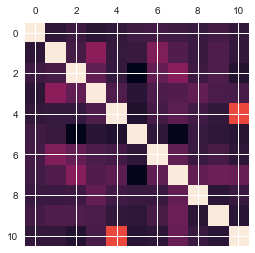

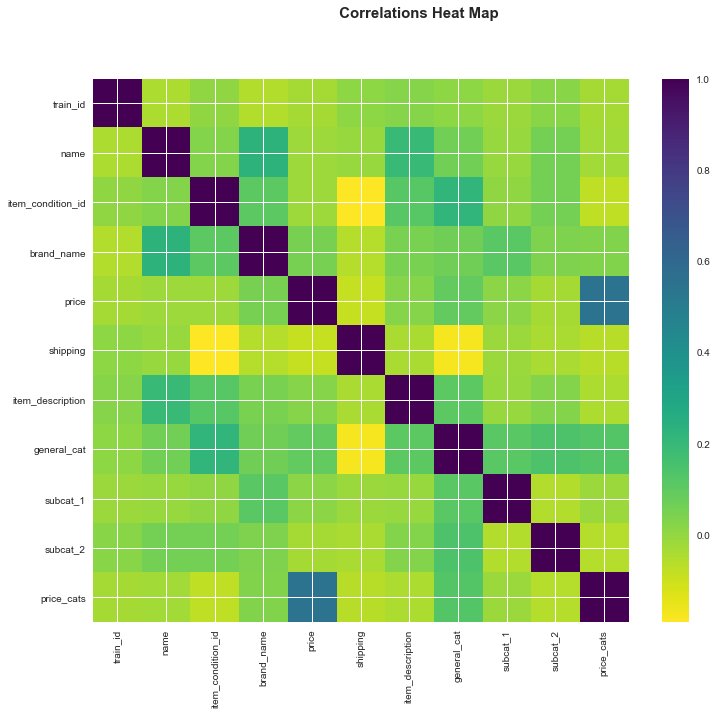

In [15]:
plt.matshow(frametrain.corr())
corr_col=frametrain.corr()
corr_col=corr_col.fillna(0)
plt.figure(figsize=(12, 10))
plt.imshow(corr_col, cmap='viridis_r', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_col)), corr_col.columns, rotation='vertical')
plt.yticks(range(len(corr_col)), corr_col.columns);
plt.suptitle(' Correlations Heat Map', fontsize=15, fontweight='bold')
plt.show()

In [16]:
price_cats = np.array(frametrain.pop('price_cats'))

In [17]:
frametrain=frametrain.drop('train_id',axis=1)

In [18]:
frametrain=frametrain.drop('price',axis=1)

[0.13224682683366198, 0.18999386549878763, 0.17418751766893115, 0.1630251025544149, 0.1776543130441896, 0.17842716535105602, 0.17801991609624582, 0.18434933523230615, 0.20054431852308724, 0.18900972159391205, 0.19432660071831392, 0.1939931475860803, 0.19433166069898364, 0.1893420486849814, 0.2029733639364847, 0.19770397246499216, 0.206387779059025, 0.21407531598091398, 0.22290403401085154, 0.21661689867581724, 0.21427867765988542, 0.21918401651732533, 0.21925925052027023, 0.2194211960045048, 0.2205844267888053, 0.22062465485342359, 0.21712447675744767, 0.2218805540135249, 0.22315873488838517, 0.22319774262861247, 0.21821559325188478, 0.21691689195318348, 0.22311546747404815]
[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97]


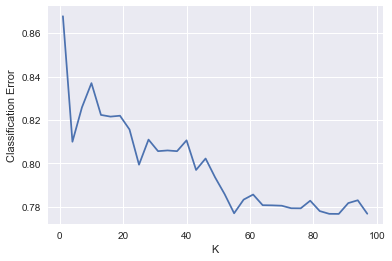

Optimal value of K is 88 
accuracy_score 0.215


In [19]:
Knnmethod(frametrain,price_cats)

[0.1532672225413924, 0.18579775729217402, 0.19079253081133776, 0.1810427930380913, 0.19436556956120576, 0.16788204292524006, 0.1794090640968396, 0.1832927338603213, 0.17038052035142837, 0.162108124073008, 0.1759193908990412, 0.18393665877173077, 0.1947769375300965, 0.1988509598932755, 0.19292564189654993, 0.19405642777733578, 0.18420509938685078, 0.1779878181129283, 0.1728360825187155, 0.17549590440414714, 0.18410865633044593, 0.1851198286726497, 0.196787470830668, 0.1936885288284054, 0.1963857593087684, 0.1902946654432843, 0.1841593286721115, 0.18895489198332277, 0.18795370240984405, 0.18539815632990772, 0.18679198840145064, 0.19052584368320485, 0.18782553818500042]
[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97]


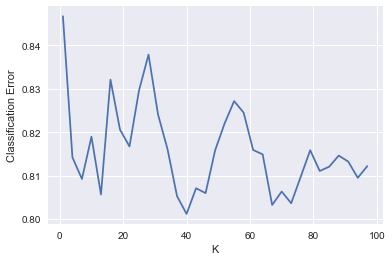

Optimal value of K is 40 
accuracy_score 0.21


In [20]:
frametrain1=frametrain[['brand_name','general_cat']]
Knnmethod(frametrain1,price_cats)

[0.1595888341260072, 0.18621394853065437, 0.16903494345795256, 0.17722823767475543, 0.19142929765894798, 0.17853833263905258, 0.17276245869421009, 0.1948490744489128, 0.18363804216647298, 0.19853848230817078, 0.19729512548378256, 0.1935716581880261, 0.19669805008880825, 0.1898210455672254, 0.18997246643551374, 0.18585168651507175, 0.19089972036974684, 0.1875072678814965, 0.18863246876543965, 0.18493321476740518, 0.1811458253275767, 0.18376316704159784, 0.19142165692569751, 0.19170451663626803, 0.18786957892239997, 0.19410211379863157, 0.1905090468841571, 0.19294267829339826, 0.19293664773858724, 0.18783811618883614, 0.19068382391435582, 0.19434956379696314, 0.19796875384386403]
[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97]


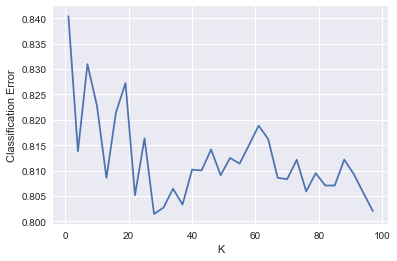

Optimal value of K is 28 
0.19


In [40]:
frametrain1=frametrain[['general_cat','subcat_1','brand_name']]
Knnmethod(frametrain1,price_cats)

[0.161644728006835, 0.20212270587674644, 0.19644980849300567, 0.1881274694059002, 0.19548024091199231, 0.20813784491539417, 0.19700777841513956, 0.2185868111710016, 0.21460511515617303, 0.21313119070663883, 0.20947748698064594, 0.22540376451836924, 0.22637063533978016, 0.21761012263767188, 0.2227030340851234, 0.22028200039748674, 0.21036311384276418, 0.2198300400500665, 0.21766503258716013, 0.21012108757634765, 0.203551479473607, 0.20740760505534234, 0.21114725941606632, 0.21395422945650688, 0.2167281953280337, 0.21658944151156906, 0.22026370221021999, 0.21791745787271793, 0.21542049722243667, 0.2153302541321936, 0.2092323703087, 0.21409874144857982, 0.214043088046247]
[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97]


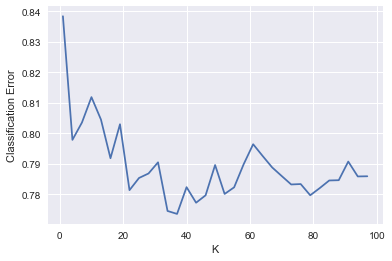

Optimal value of K is 37 
0.175


In [41]:
frametrain1=frametrain[['general_cat','subcat_1','item_condition_id']]
Knnmethod(frametrain1,price_cats)

[0.17520140795633007, 0.1800705744935836, 0.17428363932081242, 0.17363946177243267, 0.18531112488745458, 0.19092327578876211, 0.18771295620825446, 0.18960576376312493, 0.19240330100402098, 0.2035013162222242, 0.1962410663095353, 0.18995735582372372, 0.19276086299830056, 0.19000923889999707, 0.18605446632415484, 0.18865589335241112, 0.18464111574095415, 0.1900521396763683, 0.19242886313412316, 0.186251855182725, 0.18249564217739353, 0.190158022186453, 0.19031451406855462, 0.1955385583169891, 0.186654210957032, 0.1878813879577177, 0.19036618974129996, 0.1866393982401182, 0.1828084426103821, 0.18538173343455444, 0.19320153210977484, 0.19920002837303746, 0.19651637289148308]
[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97]


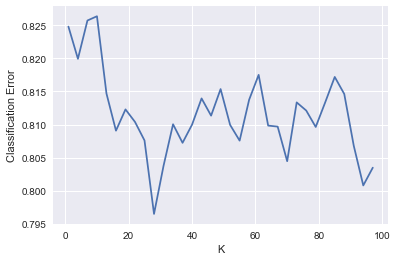

Optimal value of K is 28 
0.185


In [42]:
frametrain1=frametrain[['general_cat','subcat_1','item_condition_id','brand_name']]
Knnmethod(frametrain1,price_cats)

[0.18134337921848942, 0.19360864006206352, 0.1804689189006703, 0.16768657552164754, 0.18291281414246446, 0.18862729187259014, 0.18164641531942444, 0.20093332353316193, 0.19712826680127593, 0.1973950241403224, 0.19614718428794245, 0.1876276854940534, 0.18895633419377172, 0.18992723756799573, 0.1886865009561895, 0.19237611389492085, 0.18963025812467482, 0.18877008839431703, 0.18727532590829682, 0.18241500127358196, 0.1873627567701179, 0.1913343107573199, 0.1964293217312612, 0.19648103830736802, 0.18300891548944737, 0.18798680083752078, 0.19149741594481529, 0.18784652444724442, 0.18529531316954181, 0.1865533994607606, 0.190624300104832, 0.19679003998743932, 0.19269996339736276]
[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97]


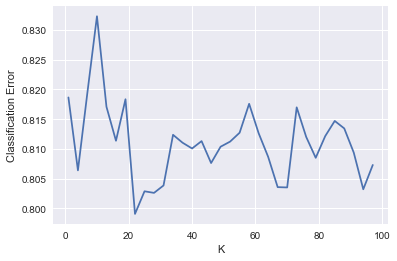

Optimal value of K is 22 
0.19


In [43]:
frametrain1=frametrain[['general_cat','subcat_1','item_condition_id','brand_name','shipping']]
Knnmethod(frametrain1,price_cats)

#### Observation: We are getting low accuracy by using the Knn classification and the best accuracy is when we include all the columns with out droping any, that is 21.5%

## Hot Code

In [21]:
frametrain['NiceCondition']=0
frametrain.loc[(frametrain.item_condition_id==1),'NiceCondition']=1
frametrain.loc[(frametrain.item_condition_id==2),'NiceCondition']=1
frametrain.loc[(frametrain.item_condition_id==3),'NiceCondition']=1

In [22]:
frametrain.head()

,name,item_condition_id,brand_name,shipping,item_description,general_cat,subcat_1,subcat_2,NiceCondition
0,513,3,0,1,592,5,69,191,1
1,746,3,171,0,800,1,23,57,1
2,64,1,192,1,76,10,70,21,1
3,450,1,0,1,574,3,39,105,1
4,32,1,0,0,255,10,42,145,1


In [23]:
frametrain['BadName']=0
frametrain.loc[(frametrain.name<=4),'BadName']=1
frametrain.loc[(frametrain.name>=41),'BadName']=1

In [47]:
frametrain.head()

,name,item_condition_id,brand_name,shipping,item_description,general_cat,subcat_1,subcat_2,NiceCondition,BadName
0,513,3,0,1,592,5,69,191,1,1
1,746,3,171,0,800,1,23,57,1,1
2,64,1,192,1,76,10,70,21,1,1
3,450,1,0,1,574,3,39,105,1,1
4,32,1,0,0,255,10,42,145,1,0


[0.13224682683366198, 0.18999386549878763, 0.17418751766893115, 0.1630251025544149, 0.1776543130441896, 0.17842716535105602, 0.17801991609624582, 0.18434933523230615, 0.20054431852308724, 0.18900972159391205, 0.19432660071831392, 0.1939931475860803, 0.19433166069898364, 0.1893420486849814, 0.2029733639364847, 0.19770397246499216, 0.206387779059025, 0.21407531598091398, 0.22290403401085154, 0.21661689867581724, 0.21427867765988542, 0.21918401651732533, 0.21925925052027023, 0.2194211960045048, 0.2205844267888053, 0.22062465485342359, 0.21712447675744767, 0.2218805540135249, 0.22315873488838517, 0.22319774262861247, 0.21821559325188478, 0.21691689195318348, 0.22311546747404815]
[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97]


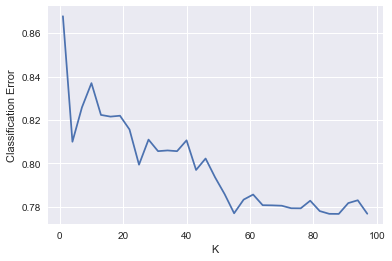

Optimal value of K is 88 
accuracy_score 0.215


In [24]:
frametrain1=frametrain[['name','item_condition_id','brand_name','shipping','item_description','general_cat','subcat_1','subcat_2','NiceCondition','BadName']]
Knnmethod(frametrain1,price_cats)

[0.1604542518163588, 0.20587728463132518, 0.19126590181784126, 0.1905790828331234, 0.19822695181202382, 0.20938729203502934, 0.20425997858542674, 0.22573018956261678, 0.2219034060023628, 0.21956255029131905, 0.20928487036031845, 0.22532688234480772, 0.22388799370381798, 0.2151146604888891, 0.21905128745776703, 0.21643326579875213, 0.2078939514790235, 0.21618474458248188, 0.22010550877763632, 0.20630698501224506, 0.20360276152488907, 0.20740760505534234, 0.20740737357950115, 0.21395422945650688, 0.21794770752315565, 0.21666667351651187, 0.21783791893775734, 0.2190917893449483, 0.21546567794532825, 0.21525302212725075, 0.21408248505339306, 0.21167440997634945, 0.21649790732335544]
[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97]


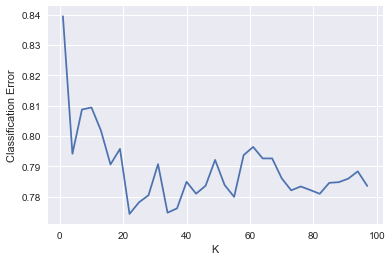

Optimal value of K is 22 
0.2


In [49]:
frametrain1=frametrain[['general_cat','subcat_1','item_condition_id','NiceCondition','BadName']]
Knnmethod(frametrain1,price_cats)

[0.15805883598720802, 0.18921673612409728, 0.1882772676192453, 0.19841316597987185, 0.19572756935003482, 0.203187506317759, 0.20097676525159627, 0.19718844614098802, 0.18195512690855037, 0.17740913430775318, 0.1724328182347577, 0.17890913430775318, 0.19251984444197198, 0.20254884969570544, 0.19387046536576363, 0.20147357567009347, 0.19044003256514275, 0.18644734753932518, 0.19129941069802955, 0.1925650857859938, 0.18882142526882462, 0.19516720956582845, 0.19180152705556758, 0.20006664926316703, 0.19784564959969014, 0.18774580867756008, 0.19009365159769215, 0.19399230114092, 0.19194271339885505, 0.18659192162035243, 0.191897174159957, 0.1880543743894464, 0.182018620081065]
[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97]


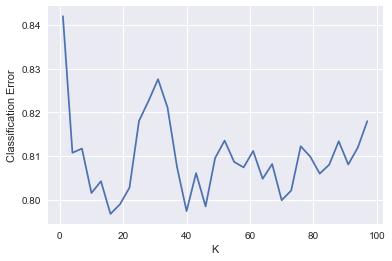

Optimal value of K is 16 
0.18


In [50]:
frametrain1=frametrain[['general_cat','NiceCondition','BadName','brand_name','shipping']]
Knnmethod(frametrain1,price_cats)

[0.17772629014143854, 0.21035894754672305, 0.21603885533117095, 0.2099732412264002, 0.2059229523782124, 0.2021314346589839, 0.2085783509760883, 0.2071662273958777, 0.19079000199526205, 0.18493753361928503, 0.17989065802451049, 0.17601198850126268, 0.19283461968533966, 0.18943828287003425, 0.19955386385580332, 0.18289232302617553, 0.17912305135358325, 0.17914838345120448, 0.18546937169990357, 0.18142907865961053, 0.18757816852556788, 0.1878460191488402, 0.19536056963900045, 0.1940446654432843, 0.20019384000268517, 0.2041373117527981, 0.19537764894523638, 0.19031518151258087, 0.19315296220578326, 0.19169756597599677, 0.1981628155858247, 0.19200366929084234, 0.19082230970616218]
[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97]


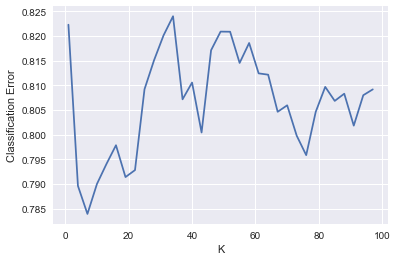

Optimal value of K is 7 
0.19


In [51]:
frametrain1=frametrain[['NiceCondition','BadName','brand_name']]
Knnmethod(frametrain1,price_cats)

[0.18282664626978468, 0.19239597208551074, 0.21667065268945965, 0.2107469579103432, 0.2202707674341527, 0.21068743410081936, 0.21068743410081936, 0.2202707674341527, 0.2202707674341527, 0.2190802912436765, 0.21550886267224795, 0.21550886267224795, 0.21550886267224795, 0.21550886267224795, 0.22146124362462888, 0.22146124362462888, 0.2190802912436765, 0.2190802912436765, 0.2190802912436765, 0.2190802912436765, 0.2202707674341527, 0.2202707674341527, 0.2202707674341527, 0.2190802912436765, 0.2190802912436765, 0.2190802912436765, 0.2190802912436765, 0.2190802912436765, 0.2190802912436765, 0.2190802912436765, 0.2190802912436765, 0.2190802912436765, 0.2190802912436765]
[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97]


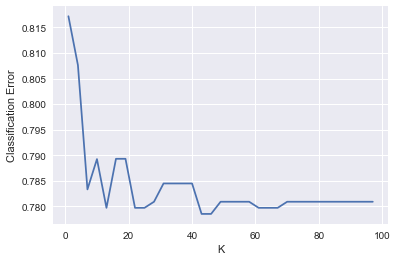

Optimal value of K is 43 
0.24


In [52]:
frametrain1=frametrain[['NiceCondition','BadName']]
Knnmethod(frametrain1,price_cats)

#### Observation : When we give Nice condition and BadName the Accuracy score is showing 24% which is slightly higher than other columns

In [25]:
def frametrain_category(data):
    return frametrain.loc[frametrain['general_cat'] == data]

In [26]:
def frame_orig_category(data):
    return frame_orig.loc[frame_orig['general_cat'] == data]

In [27]:
frame_orig['general_cat'], frame_orig['subcat_1'], frame_orig['subcat_2'] = \
zip(*frame_orig['category_name'].apply(lambda x: split_cat(x)))
frame_orig.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,0,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,0,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,0,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [28]:
frame_orig['price_cats'] =frame_orig.price.map(lambda x : divide_cats(x))
frame_orig.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat_1,subcat_2,price_cats
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,0,10.0,1,No description yet,Men,Tops,T-shirts,CAT10
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,CATOTHER
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,CAT10
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,0,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,CAT35
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,0,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,CAT45


In [29]:
dataMatrixOriginal = frame_orig.as_matrix()
dataMatrix = frametrain.as_matrix()

In [30]:
name = dataMatrix[:,5]

In [31]:
name_original = dataMatrixOriginal[:,8]

In [32]:
# create a dictionary for the neighborhood keys and values
name_dict = dict(zip(np.unique(name), np.unique(name_original)))
name_dict

{0: 'Beauty',
 1: 'Electronics',
 2: 'Handmade',
 3: 'Home',
 4: 'Kids',
 5: 'Men',
 6: 'No Label',
 7: 'Other',
 8: 'Sports & Outdoors',
 9: 'Vintage & Collectibles',
 10: 'Women'}

In [33]:
frametrain_women=frametrain_category(10)
frametrain_women.head()

,name,item_condition_id,brand_name,shipping,item_description,general_cat,subcat_1,subcat_2,NiceCondition,BadName
2,64,1,192,1,76,10,70,21,1,1
4,32,1,0,0,255,10,42,145,1,0
5,188,3,0,0,116,10,52,149,1,1
6,65,3,4,0,718,10,65,205,1,1
12,143,2,228,0,889,10,26,0,1,1


In [34]:
Frame_original=frame_orig_category('Women')
Frame_original.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat_1,subcat_2,price_cats
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,CAT10
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,0,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,CAT45
5,5,Bundled items requested for Ruie,3,Women/Other/Other,0,59.0,0,"Banana republic bottoms, Candies skirt with ma...",Women,Other,Other,CATOTHER
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,Women,Swimwear,Two-Piece,CATOTHER
12,12,Black Skater dress,2,"Women/Dresses/Above Knee, Mini",rue,16.0,0,"Xl, great condition",Women,Dresses,"Above Knee, Mini",CAT20


In [35]:
WomenPrice=Frame_original['price_cats']
WomenPrice.head()

2        CAT10
4        CAT45
5     CATOTHER
6     CATOTHER
12       CAT20
Name: price_cats, dtype: object

[0.11471130532444573, 0.19330520483627694, 0.19098066583953682, 0.18038306451612904, 0.17363080612724827, 0.1742841474886067, 0.17914388004995216, 0.18377516866961838, 0.19885051249614819, 0.19879734710261276, 0.20584957183866104, 0.19990311633338198, 0.1894071425096093, 0.19822275539661688, 0.2079627669926531, 0.19519554120241978, 0.17540513144877473, 0.20113408018294168, 0.18709781824226795, 0.18131476142979935, 0.18084630791936296, 0.18031280916005774, 0.1813094195494575, 0.1782103079031447, 0.1763010570233056, 0.1644707382539451, 0.1639724330592452, 0.1589151826983895, 0.1696982395108581, 0.17007286040967257, 0.1707018237402488, 0.17023337022981236, 0.15172130183752575]
[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97]


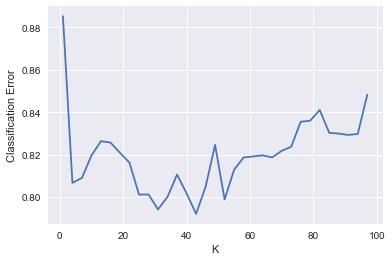

Optimal value of K is 43 
accuracy_score 0.2159090909090909


In [36]:
Knnmethod(frametrain_women,WomenPrice)

[0.1180186185309525, 0.1416383455780989, 0.173001721159928, 0.175501721159928, 0.1654291344329295, 0.1709344134676203, 0.17137558993820856, 0.1621108840558556, 0.16227428274866607, 0.15898588405585562, 0.15971018018456348, 0.15051900371397525, 0.1565851801845635, 0.16399436821875152, 0.175501721159928, 0.175501721159928, 0.18156789763051623, 0.18156789763051623, 0.18156789763051623, 0.17274436821875153, 0.178626721159928, 0.17274436821875153, 0.18156789763051623, 0.18156789763051623, 0.18156789763051623, 0.18156789763051623, 0.18156789763051623, 0.17387558993820856, 0.18156789763051623, 0.178626721159928, 0.18156789763051623, 0.18156789763051623, 0.18156789763051623]
[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97]


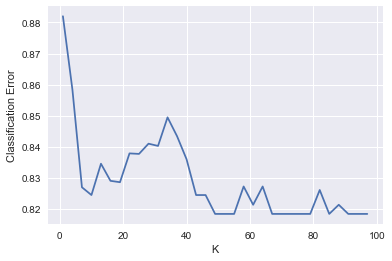

Optimal value of K is 49 
accuracy_score 0.18181818181818182


In [37]:
frametrain1=frametrain_women[['BadName']]
Knnmethod(frametrain1,WomenPrice)

[0.1807136326408148, 0.18634548484406172, 0.19747067540829397, 0.18995439635738495, 0.20672212288554795, 0.18102057282797318, 0.17457581212799428, 0.18485616455018733, 0.16231782870302794, 0.17523996902317585, 0.18066223098006778, 0.18361698008401045, 0.18339494234418335, 0.19431305648810393, 0.2008272616325273, 0.21308235618482296, 0.21918372622001656, 0.20216958392124423, 0.19591122139509237, 0.21099311333300896, 0.1888796749055288, 0.20690274331403363, 0.19375310173697272, 0.1974910394265233, 0.18282732447817837, 0.18964670607697173, 0.19213985387372484, 0.19289400168669618, 0.19091725255031708, 0.18153131537974992, 0.17286433245754879, 0.17855343502165133, 0.18677924147326425]
[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97]


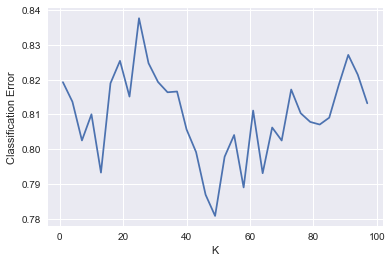

Optimal value of K is 49 
accuracy_score 0.18181818181818182


In [38]:
frametrain1=frametrain_women[['NiceCondition','BadName','brand_name']]
Knnmethod(frametrain1,WomenPrice)

[0.1257392675846186, 0.14981908561604956, 0.16537885791206475, 0.16227428274866607, 0.170500210837023, 0.1819449715370019, 0.16132794888013105, 0.1429455959389546, 0.13399398303572876, 0.14199926207041952, 0.13943515950631696, 0.13649398303572874, 0.1554183188991064, 0.16740248787687118, 0.17078484081804765, 0.16233838531276862, 0.1794449715370019, 0.17615506252128643, 0.1649308292382296, 0.14550969850305714, 0.1390580855998313, 0.1390580855998313, 0.15478389205144422, 0.1618972088421804, 0.16132794888013105, 0.14221293728409473, 0.1392717608135065, 0.1392717608135065, 0.1392717608135065, 0.1392717608135065, 0.1392717608135065, 0.15822337371673237, 0.14572337371673236]
[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97]


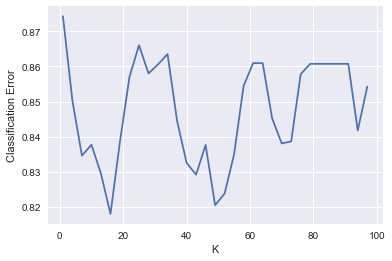

Optimal value of K is 16 
accuracy_score 0.125


In [39]:
frametrain1=frametrain_women[['NiceCondition']]
Knnmethod(frametrain1,WomenPrice)

#### Observation : The Accuracy is less even when we predict the price for women category alone

## Model 4 : K - Means Clustering

In [19]:
frame = pd.DataFrame(data)

In [20]:
frame.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [21]:
def divide_cats(data):
    if( data <=5):
        return "CAT5"
    if( 5 < data <=10):
        return "CAT10"
    if( 10 < data <=15):
        return "CAT15"
    if( 15 < data <=20):
        return "CAT20"
    if(20 < data <=25):
        return "CAT25"
    if( 25< data <=30):
        return "CAT30"
    if( 30 < data <=35):
        return "CAT35"
    if( 35 < data <=40):
        return "CAT40"
    if( 40 < data <=45):
        return "CAT45"
    if(45 < data <=50):
        return "CAT50"
    return "CATOTHER"

In [22]:
frame['price_cats'] =frame.price.map(lambda x : divide_cats(x))

In [23]:
frame.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,price_cats
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,CAT10
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,CATOTHER
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,CAT10
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,CAT35
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,CAT45


In [24]:
frame = frame.drop('price', axis = 1)

In [25]:
X = frame

In [32]:
price_cats = frame.price_cats

In [26]:
def split_cat(text):
    try: return text.split("/")
    except: return ("No Label", "No Label", "No Label")

In [27]:
frame['main_category'], frame['subcat_1'], frame['subcat_2'] =zip(*frame['category_name'].apply(lambda x: split_cat(x)))

In [28]:
frame = frame.drop('category_name', axis = 1)
frame.head()

,train_id,name,item_condition_id,brand_name,shipping,item_description,price_cats,main_category,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,NaN,1,No description yet,CAT10,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Razer,0,This keyboard is in great condition and works ...,CATOTHER,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Target,1,Adorable top with a hint of lace and a key hol...,CAT10,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,NaN,1,New with tags. Leather horses. Retail for [rm]...,CAT35,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,NaN,0,Complete with certificate of authenticity,CAT45,Women,Jewelry,Necklaces


In [29]:
for column in frame:
    if frame[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        frame[column] = le.fit_transform(frame[column].astype(str))   
        
print(frame.info())
frame.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 10 columns):
train_id             1482535 non-null int64
name                 1482535 non-null int64
item_condition_id    1482535 non-null int64
brand_name           1482535 non-null int64
shipping             1482535 non-null int64
item_description     1482535 non-null int64
price_cats           1482535 non-null int64
main_category        1482535 non-null int64
subcat_1             1482535 non-null int64
subcat_2             1482535 non-null int64
dtypes: int64(10)
memory usage: 113.1 MB
None


,train_id,name,item_condition_id,brand_name,shipping,item_description,price_cats,main_category,subcat_1,subcat_2
0,0,640809,3,4788,1,806610,0,5,103,763
1,1,903932,3,3557,0,1090878,10,1,30,212
2,2,91532,1,4180,1,115289,0,10,104,94
3,3,561143,1,4788,1,782305,5,3,55,404
4,4,45483,1,4788,0,366652,7,10,58,536


In [30]:
def Kmeansmethod(frame1,frame1_name):
    np.random.seed(5)
    X = frame1
    y = price_cats
    estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]
    X  = X.values
    y = y.values
    fignum = 1
    titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
    for name, est in estimators:
        fig = plt.figure(fignum, figsize=(4, 3))
        ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
        est.fit(X)
        labels = est.labels_

        ax.scatter(X[:, 3], X[:, 0], X[:, 2],
                   c=labels.astype(np.float), edgecolor='k')

        ax.w_xaxis.set_ticklabels([])
        ax.w_yaxis.set_ticklabels([])
        ax.w_zaxis.set_ticklabels([])
        ax.set_xlabel(frame1_name[3])
        ax.set_ylabel(frame1_name[0])
        ax.set_zlabel(frame1_name[2])
        ax.set_title(titles[fignum - 1])
        ax.dist = 12
        fignum = fignum + 1


    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


    for name, label in [(frame1_name[0], 0),
                        (frame1_name[1], 1),
                        (frame1_name[2], 2)]:
        ax.text3D(X[y == label, 3].mean(),
                  X[y == label, 0].mean(),
                  X[y == label, 2].mean() + 2, name,
                  horizontalalignment='center',
                  bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

    # Labels reorder

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel(frame1_name[3])
    ax.set_ylabel(frame1_name[0])
    ax.set_zlabel(frame1_name[2])
    ax.set_title('Sale Price Category')
    ax.dist = 12

    fig.show()

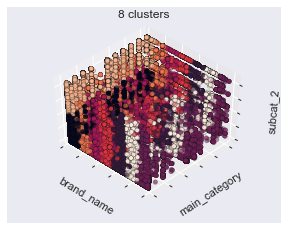

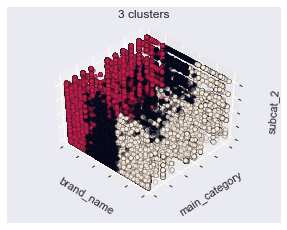

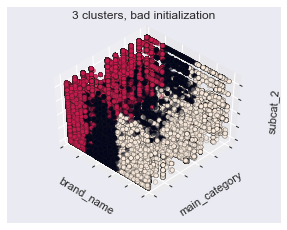

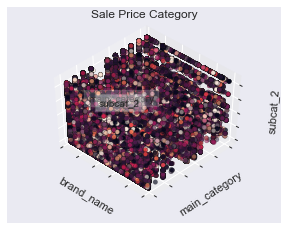

In [33]:
frame1=frame[['main_category','subcat_1','subcat_2','brand_name']]
frame1_name = ['main_category','subcat_1','subcat_2','brand_name']
Kmeansmethod(frame1,frame1_name)

# Model 5 : Random Forest Regression

In [35]:
frame.head()

,train_id,name,item_condition_id,brand_name,shipping,item_description,price_cats,main_category,subcat_1,subcat_2
0,0,640809,3,4788,1,806610,0,5,103,763
1,1,903932,3,3557,0,1090878,10,1,30,212
2,2,91532,1,4180,1,115289,0,10,104,94
3,3,561143,1,4788,1,782305,5,3,55,404
4,4,45483,1,4788,0,366652,7,10,58,536


In [36]:
frame = frame.drop('price_cats', axis = 1)
frame.head()

,train_id,name,item_condition_id,brand_name,shipping,item_description,main_category,subcat_1,subcat_2
0,0,640809,3,4788,1,806610,5,103,763
1,1,903932,3,3557,0,1090878,1,30,212
2,2,91532,1,4180,1,115289,10,104,94
3,3,561143,1,4788,1,782305,3,55,404
4,4,45483,1,4788,0,366652,10,58,536


In [48]:
print(frame.shape)
print(price1.shape)

(1482535, 9)
(1482535,)


In [41]:
price1 = data['price']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(frame, price1,train_size=400,random_state=4)

In [43]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=150,n_jobs=-1,min_samples_leaf=5, max_features=0.5)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
predict_test= model.predict(X_test)

In [49]:
printb('Accuracy score',model.score(X_test,y_test))

Accuracy score 0.0320272133811


#### Conclusion: 
Random Forest Regressor has not shown up standard accuracy score. 

# conclusion:
1. Linear Regression : The correlation between the attributes is observed to be very poor. The mean square error is observed to be around 1000. By diving the data into categories we were able to improve the model but couldnt mark it as ideal fit for this dataset.

2. Naive bayes : Based on the item descrption, we were able to predict the price category. We identified the naive bayes would improve the accuracy fo the prediction for the price cateogries CAT5, CAT10, CAT15.

3. K NN : On including all the features for the model to predict the price category we observed 21.5% accuracy. 

4. K Means : Based on the features included, we were able to observe the various clusters for the data.

5. Random Forest Regressor : Implementing this model for prediction of the sale price we observed the accuracy score.